# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [20]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [21]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    I = np.identity(X_train.shape[1])
    #Calculating the mean
    mu_pos = np.mean(X_train[Y_train==1],axis=0)
    mu_neg = np.mean(X_train[Y_train==-1],axis=0)
    
    #Calculating the prior probablity
    Py_pos = Y_train[Y_train==1].shape[0]/Y_train.shape[0]
    Py_neg = 1-Py_pos
    
    #Making predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        eta = (Py_pos*np.exp((-1/2)*np.linalg.norm(X_test[i,:]-mu_pos)**2))/(Py_pos*np.exp((-1/2)*np.linalg.norm(X_test[i,:]-mu_pos)**2) + Py_neg*np.exp((-1/2)*np.linalg.norm(X_test[i,:]-mu_neg)**2))
        if eta >= 0.5:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    
    return Y_test_pred
        
    
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    #Covariance matrix 
    cov = np.cov(X_train,rowvar = False)
    #Calculating the mean
    mu_pos = np.mean(X_train[Y_train==1],axis=0)
    mu_neg = np.mean(X_train[Y_train==-1],axis=0)
    
    #Calculating the prior probablity
    Py_pos = Y_train[Y_train==1].shape[0]/Y_train.shape[0]
    Py_neg = 1-Py_pos
    
    #Making Predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        pos_exp = (-1/2)*np.matmul(np.matmul((X_test[i,:]-mu_pos),np.linalg.inv(cov)),(X_test[i,:]-mu_pos))
        neg_exp = (-1/2)*np.matmul(np.matmul((X_test[i,:]-mu_neg),np.linalg.inv(cov)),(X_test[i,:]-mu_neg))
        eta = (Py_pos*np.exp(pos_exp))/(Py_pos*np.exp(pos_exp) + Py_neg*np.exp(neg_exp))
        if eta >= 0.5:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    #df = np.column_stack((X_train,Y_train))
    cov_pos = np.cov(X_train[Y_train==1],rowvar=False)
    cov_neg = np.cov(X_train[Y_train==-1],rowvar=False)
    
    #Calculating the mean
    mu_pos = np.mean(X_train[Y_train==1],axis=0)
    mu_neg = np.mean(X_train[Y_train==-1],axis=0)
    
    #Calculating the prior probablity
    Py_pos = Y_train[Y_train==1].shape[0]/Y_train.shape[0]
    Py_neg = 1-Py_pos
    #Making Predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        pos_exp = (-1/2)*np.matmul(np.matmul((X_test[i,:]-mu_pos),np.linalg.inv(cov_pos)),(X_test[i,:]-mu_pos))
        neg_exp = (-1/2)*np.matmul(np.matmul((X_test[i,:]-mu_neg),np.linalg.inv(cov_neg)),(X_test[i,:]-mu_neg))
        eta = (Py_pos*np.exp(pos_exp))/(Py_pos*np.exp(pos_exp) + Py_neg*np.exp(neg_exp))
        if eta >= 0.5:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    return Y_test_pred
    
    




In [22]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


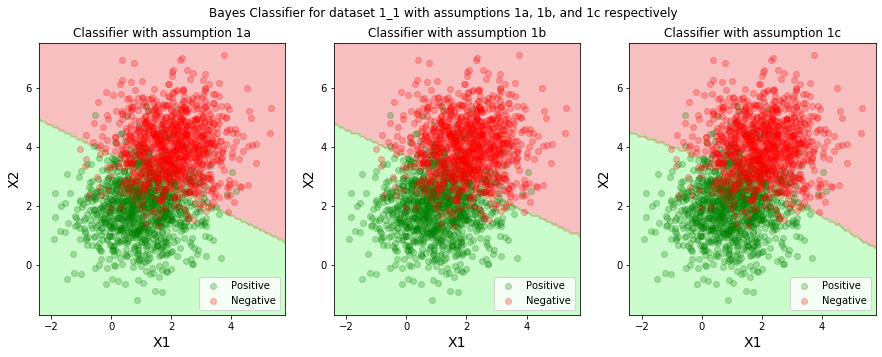

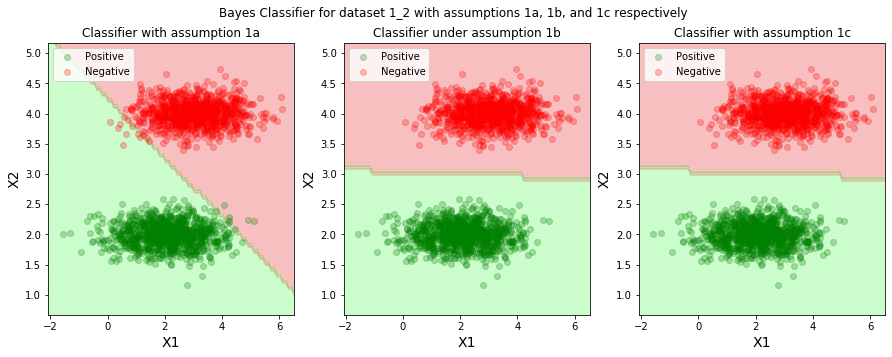

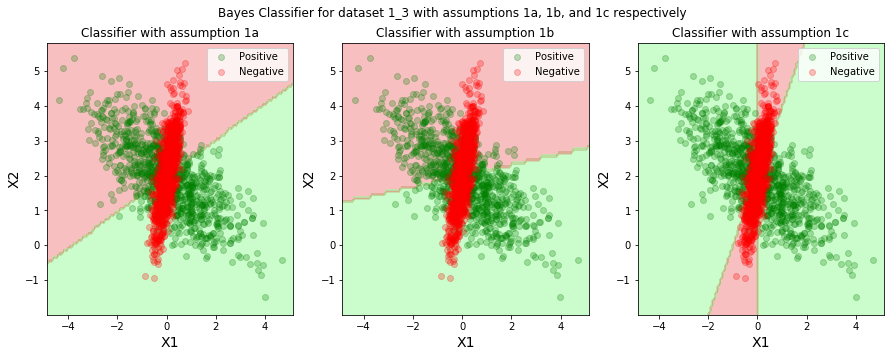

In [23]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

#Loading the dataset
Data1 = np.load('Data/dataset1_1.npz')
X_train1 = Data1['arr_0']
Y_train1 = Data1['arr_1']
X_test1 = Data1['arr_2']
Y_test1 = Data1['arr_3']

Data2 = np.load('Data/dataset1_2.npz')
X_train2 = Data2['arr_0']
Y_train2 = Data2['arr_1']
X_test2 = Data2['arr_2']
Y_test2 = Data2['arr_3']

Data3 = np.load('Data/dataset1_3.npz')
X_train3 = Data3['arr_0']
Y_train3 = Data3['arr_1']
X_test3 = Data3['arr_2']
Y_test3 = Data3['arr_3']

#Getting the predicted classes
Y_pred_1_1 = Bayes1a(X_train1, Y_train1, X_test1)
Y_pred_1_2 = Bayes1b(X_train1, Y_train1, X_test1)
Y_pred_1_3 = Bayes1c(X_train1, Y_train1, X_test1)
Y_pred_2_1 = Bayes1a(X_train2, Y_train2, X_test2)
Y_pred_2_2 = Bayes1b(X_train2, Y_train2, X_test2)
Y_pred_2_3 = Bayes1c(X_train2, Y_train2, X_test2)
Y_pred_3_1 = Bayes1a(X_train3, Y_train3, X_test3)
Y_pred_3_2 = Bayes1b(X_train3, Y_train3, X_test3)
Y_pred_3_3 = Bayes1c(X_train3, Y_train3, X_test3)

#Separating the positive and the negative class 
pos_X_train1 = X_train1[Y_train1[:,] == 1]
neg_X_train1 = X_train1[Y_train1[:,] == -1]
pos_X_train2 = X_train2[Y_train2[:,] == 1]
neg_X_train2 = X_train2[Y_train2[:,] == -1]
pos_X_train3 = X_train3[Y_train3[:,] == 1]
neg_X_train3 = X_train3[Y_train3[:,] == -1]

#Creating a gridspace to make decision boundaries
X_axis1, Y_axis1 = np.meshgrid(np.arange(start = X_train1[:, 0].min() - 0.5, stop = X_train1[:, 0].max() + 0.5, step = 0.1),
                     np.arange(start = X_train1[:, 1].min() - 0.5, stop = X_train1[:, 1].max() + 0.5, step = 0.1))
X_axis2, Y_axis2 = np.meshgrid(np.arange(start = X_train2[:, 0].min() - 0.5, stop = X_train2[:, 0].max() + 0.5, step = 0.1),
                     np.arange(start = X_train2[:, 1].min() - 0.5, stop = X_train2[:, 1].max() + 0.5, step = 0.1))
X_axis3, Y_axis3 = np.meshgrid(np.arange(start = X_train3[:, 0].min() - 0.5, stop = X_train3[:, 0].max() + 0.5, step = 0.1),
                     np.arange(start = X_train3[:, 1].min() - 0.5, stop = X_train3[:, 1].max() + 0.5, step = 0.1))

#Figure Size
plt.rcParams['figure.figsize'] = [15,5]


#First row of plots (dataset1)
fig, ax = plt.subplots(nrows = 1, ncols = 3)


fig.suptitle('Bayes Classifier for dataset 1_1 with assumptions 1a, 1b, and 1c respectively') 
ax[0].contourf(X_axis1, Y_axis1, Bayes1a(X_train1, Y_train1, np.array([X_axis1.ravel(), Y_axis1.ravel()]).T).reshape(X_axis1.shape),
             alpha = 0.5, colors = ['lightcoral', 'palegreen'])
ax[0].scatter(pos_X_train1[:,0], pos_X_train1[:,1], c = 'green', label = 'Positive', alpha = 0.25)
ax[0].scatter(neg_X_train1[:,0], neg_X_train1[:,1], c = 'red', label = 'Negative', alpha = 0.25)
ax[0].set_xlabel('X1',fontsize=14)
ax[0].set_ylabel('X2',fontsize=14)
ax[0].title.set_text('Classifier with assumption 1a')
ax[0].legend()


ax[1].contourf(X_axis1, Y_axis1, Bayes1b(X_train1, Y_train1, np.array([X_axis1.ravel(), Y_axis1.ravel()]).T).reshape(X_axis1.shape),
             alpha = 0.5, colors = ['lightcoral', 'palegreen'])
ax[1].scatter(pos_X_train1[:,0], pos_X_train1[:,1], c = 'green', label = 'Positive', alpha = 0.25)
ax[1].scatter(neg_X_train1[:,0], neg_X_train1[:,1], c = 'red', label = 'Negative', alpha = 0.25)
ax[1].set_xlabel('X1',fontsize=14)
ax[1].set_ylabel('X2',fontsize=14)
ax[1].title.set_text('Classifier with assumption 1b')
ax[1].legend()


ax[2].contourf(X_axis1, Y_axis1, Bayes1c(X_train1, Y_train1, np.array([X_axis1.ravel(), Y_axis1.ravel()]).T).reshape(X_axis1.shape),
             alpha = 0.5, colors = ['lightcoral', 'palegreen'])
ax[2].scatter(pos_X_train1[:,0], pos_X_train1[:,1], c = 'green', label = 'Positive', alpha = 0.25)
ax[2].scatter(neg_X_train1[:,0], neg_X_train1[:,1], c = 'red', label = 'Negative', alpha = 0.25)
ax[2].set_xlabel('X1',fontsize=14)
ax[2].set_ylabel('X2',fontsize=14)
ax[2].title.set_text('Classifier with assumption 1c')
ax[2].legend()


#Second row of plots (dataset 2)
fig1, ax1 = plt.subplots(nrows = 1, ncols = 3)

fig1.suptitle('Bayes Classifier for dataset 1_2 with assumptions 1a, 1b, and 1c respectively')
ax1[0].contourf(X_axis2, Y_axis2, Bayes1a(X_train2, Y_train2, np.array([X_axis2.ravel(), Y_axis2.ravel()]).T).reshape(X_axis2.shape),
             alpha = 0.5, colors = ['lightcoral', 'palegreen'])
ax1[0].scatter(pos_X_train2[:,0], pos_X_train2[:,1], c = 'green', label = 'Positive', alpha = 0.25)
ax1[0].scatter(neg_X_train2[:,0], neg_X_train2[:,1], c = 'red', label = 'Negative', alpha = 0.25)
ax1[0].set_xlabel('X1',fontsize=14)
ax1[0].set_ylabel('X2',fontsize=14)
ax1[0].title.set_text('Classifier with assumption 1a')
ax1[0].legend()


ax1[1].contourf(X_axis2, Y_axis2, Bayes1b(X_train2, Y_train2, np.array([X_axis2.ravel(), Y_axis2.ravel()]).T).reshape(X_axis2.shape),
             alpha = 0.5, colors = ['lightcoral', 'palegreen'])
ax1[1].scatter(pos_X_train2[:,0], pos_X_train2[:,1], c = 'green', label = 'Positive', alpha = 0.25)
ax1[1].scatter(neg_X_train2[:,0], neg_X_train2[:,1], c = 'red', label = 'Negative', alpha = 0.25)
ax1[1].set_xlabel('X1',fontsize=14)
ax1[1].set_ylabel('X2',fontsize=14)
ax1[1].title.set_text('Classifier under assumption 1b')
ax1[1].legend()


ax1[2].contourf(X_axis2, Y_axis2, Bayes1c(X_train2, Y_train2, np.array([X_axis2.ravel(), Y_axis2.ravel()]).T).reshape(X_axis2.shape),
             alpha = 0.5, colors = ['lightcoral', 'palegreen'])
ax1[2].scatter(pos_X_train2[:,0], pos_X_train2[:,1], c = 'green', label = 'Positive', alpha = 0.25)
ax1[2].scatter(neg_X_train2[:,0], neg_X_train2[:,1], c = 'red', label = 'Negative', alpha = 0.25)
ax1[2].set_xlabel('X1',fontsize=14)
ax1[2].set_ylabel('X2',fontsize=14)
ax1[2].title.set_text('Classifier with assumption 1c')
ax1[2].legend()


#Third row of plots (dataset 3)
fig2, ax2 = plt.subplots(nrows = 1, ncols = 3)

fig2.suptitle('Bayes Classifier for dataset 1_3 with assumptions 1a, 1b, and 1c respectively')
ax2[0].contourf(X_axis3, Y_axis3, Bayes1a(X_train3, Y_train3, np.array([X_axis3.ravel(), Y_axis3.ravel()]).T).reshape(X_axis3.shape),
             alpha = 0.5, colors = ['lightcoral', 'palegreen'])
ax2[0].scatter(pos_X_train3[:,0], pos_X_train3[:,1], c = 'green', label = 'Positive', alpha = 0.25)
ax2[0].scatter(neg_X_train3[:,0], neg_X_train3[:,1], c = 'red', label = 'Negative', alpha = 0.25)
ax2[0].set_xlabel('X1',fontsize=14)
ax2[0].set_ylabel('X2',fontsize=14)
ax2[0].title.set_text('Classifier with assumption 1a')
ax2[0].legend()


ax2[1].contourf(X_axis3, Y_axis3, Bayes1b(X_train3, Y_train3, np.array([X_axis3.ravel(), Y_axis3.ravel()]).T).reshape(X_axis3.shape),
             alpha = 0.5, colors = ['lightcoral', 'palegreen'])
ax2[1].scatter(pos_X_train3[:,0], pos_X_train3[:,1], c = 'green', label = 'Positive', alpha = 0.25)
ax2[1].scatter(neg_X_train3[:,0], neg_X_train3[:,1], c = 'red', label = 'Negative', alpha = 0.25)
ax2[1].set_xlabel('X1',fontsize=14)
ax2[1].set_ylabel('X2',fontsize=14)
ax2[1].title.set_text('Classifier with assumption 1b')
ax2[1].legend()


ax2[2].contourf(X_axis3, Y_axis3, Bayes1c(X_train3, Y_train3, np.array([X_axis3.ravel(), Y_axis3.ravel()]).T).reshape(X_axis3.shape),
             alpha = 0.5, colors = ['lightcoral', 'palegreen'])
ax2[2].scatter(pos_X_train3[:,0], pos_X_train3[:,1], c = 'green', label = 'Positive', alpha = 0.25)
ax2[2].scatter(neg_X_train3[:,0], neg_X_train3[:,1], c = 'red', label = 'Negative', alpha = 0.25)
ax2[2].set_xlabel('X1',fontsize=14)
ax2[2].set_ylabel('X2',fontsize=14)
ax2[2].title.set_text('Classifier with assumption 1c')
ax2[2].legend()




** Cell type : TextWrite ** 
(Write your observations and table of errors here)

## Error Rate:
| Dataset\Assumption | Classifier 1a  | Classifier 1b | Classifier 1c |
| :---:              | :-------------:|:-----------:  |      :------: |
| Dataset 1          | 0.126          | 0.1245        | 0.1245        |
| Dataset 2          | 0.0849         | 0             |             0 |
| Dataset 3          | 0.497          | 0.495         |         0.264 |

## Observations:
1. It can be observed that the accuracy increases when we move from classification 1a to classification 1c. This is beacuse in case 1a we have asummed the data for both the classes (+1,-1) has the same unit variance. This is equivalent to us ignoring the variance observed in the data. 
2. When we move to class 1b, we use the data to compute a common variance. Doing this will reduce the performance when both the classes vary in different directions (as given in dataset 3). 
3. In the final case (1c) we compute different covariance matrices of each class, this allows us to tackle the issue of data described in the above point. This is the best classifier that we can achieve by using Naive Bayes Classification.



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [24]:
# Cell type : CodeWrite
# Fill in functions in this cell

#Initializing the loss matrix
L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    #Calculating the mean of each class
    mu_one = np.mean(X_train[Y_train==1],axis=0)
    mu_two = np.mean(X_train[Y_train==2],axis=0)
    mu_three = np.mean(X_train[Y_train==3],axis=0)
    mu_four = np.mean(X_train[Y_train==4],axis=0)
    
    #Calculating the prior probablity of each class
    Py_one = Y_train[Y_train==1].shape[0]/Y_train.shape[0]
    Py_two = Y_train[Y_train==2].shape[0]/Y_train.shape[0]
    Py_three = Y_train[Y_train==3].shape[0]/Y_train.shape[0]
    Py_four = Y_train[Y_train==4].shape[0]/Y_train.shape[0]
    
    
    #Calculating the outcome
    I = np.identity(X_train.shape[1])
    Y_pred = np.zeros(X_test.shape[0])
    
    for i in range(len(X_test)):
        exp1 = Py_one*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_one),I),(X_test[i,:]-mu_one)))
        exp2 = Py_two*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_two),I),(X_test[i,:]-mu_two)))
        exp3 = Py_three*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_three),I),(X_test[i,:]-mu_three)))
        exp4 = Py_four*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_four),I),(X_test[i,:]-mu_four)))
        
        exp_tot = exp1+exp2+exp3+exp4
        
        eta1 = exp1/exp_tot
        eta2 = exp2/exp_tot
        eta3 = exp3/exp_tot
        eta4 = exp4/exp_tot
        
        eta = np.array([eta1,eta2,eta3,eta4])
        
        loss = np.matmul(eta,L)
        Y_pred[i] = loss.argmin()+1
   
    return Y_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    #Calculating the mean of each class
    mu_one = np.mean(X_train[Y_train==1],axis=0)
    mu_two = np.mean(X_train[Y_train==2],axis=0)
    mu_three = np.mean(X_train[Y_train==3],axis=0)
    mu_four = np.mean(X_train[Y_train==4],axis=0)
    
    #Calculating the prior probablity of each class
    Py_one = Y_train[Y_train==1].shape[0]/Y_train.shape[0]
    Py_two = Y_train[Y_train==2].shape[0]/Y_train.shape[0]
    Py_three = Y_train[Y_train==3].shape[0]/Y_train.shape[0]
    Py_four = Y_train[Y_train==4].shape[0]/Y_train.shape[0]
    
    #Calculating the outcome
    Y_pred = np.zeros(X_test.shape[0])
    cov = np.cov(X_train,rowvar=False) #Common covariance matrix
    
    for i in range(len(X_test)):
        exp1 = Py_one*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_one),np.linalg.inv(cov)),(X_test[i,:]-mu_one)))
        exp2 = Py_two*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_two),np.linalg.inv(cov)),(X_test[i,:]-mu_two)))
        exp3 = Py_three*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_three),np.linalg.inv(cov)),(X_test[i,:]-mu_three)))
        exp4 = Py_four*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_four),np.linalg.inv(cov)),(X_test[i,:]-mu_four)))
        
        exp_tot = exp1+exp2+exp3+exp4
        
        eta1 = exp1/exp_tot
        eta2 = exp2/exp_tot
        eta3 = exp3/exp_tot
        eta4 = exp4/exp_tot
        
        eta = np.array([eta1,eta2,eta3,eta4])
        
        loss = np.matmul(eta,L)
        Y_pred[i] = loss.argmin()+1
        
    return Y_pred
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    #Calculating the mean of each class
    mu_one = np.mean(X_train[Y_train==1],axis=0)
    mu_two = np.mean(X_train[Y_train==2],axis=0)
    mu_three = np.mean(X_train[Y_train==3],axis=0)
    mu_four = np.mean(X_train[Y_train==4],axis=0)
    
    #Calculating the prior probablity of each class
    Py_one = Y_train[Y_train==1].shape[0]/Y_train.shape[0]
    Py_two = Y_train[Y_train==2].shape[0]/Y_train.shape[0]
    Py_three = Y_train[Y_train==3].shape[0]/Y_train.shape[0]
    Py_four = Y_train[Y_train==4].shape[0]/Y_train.shape[0]
    
    #Calculating the covariance matrix of each class
    cov_one = np.cov(X_train[Y_train==1],rowvar=False)
    cov_two = np.cov(X_train[Y_train==2],rowvar=False)
    cov_three = np.cov(X_train[Y_train==3],rowvar=False)
    cov_four = np.cov(X_train[Y_train==4],rowvar=False)
    
    #Calculating the outcome
    Y_pred = np.zeros(X_test.shape[0])
    
    for i in range(len(X_test)):
        exp1 = Py_one*(1/np.sqrt(np.linalg.det(cov_one)))*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_one),np.linalg.inv(cov_one)),(X_test[i,:]-mu_one)))
        exp2 = Py_two*(1/np.sqrt(np.linalg.det(cov_two)))*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_two),np.linalg.inv(cov_two)),(X_test[i,:]-mu_two)))
        exp3 = Py_three*(1/np.sqrt(np.linalg.det(cov_three)))*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_three),np.linalg.inv(cov_three)),(X_test[i,:]-mu_three)))
        exp4 = Py_four*(1/np.sqrt(np.linalg.det(cov_four)))*np.exp((-0.5)*np.matmul(np.matmul((X_test[i,:]-mu_four),np.linalg.inv(cov_four)),(X_test[i,:]-mu_four)))
        
        exp_tot = exp1+exp2+exp3+exp4
        
        eta1 = exp1/exp_tot
        eta2 = exp2/exp_tot
        eta3 = exp3/exp_tot
        eta4 = exp4/exp_tot
        
        eta = np.array([eta1,eta2,eta3,eta4])
        
        loss = np.matmul(eta,L)
        Y_pred[i] = loss.argmin()+1
    
    return Y_pred
    
    


    


In [25]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


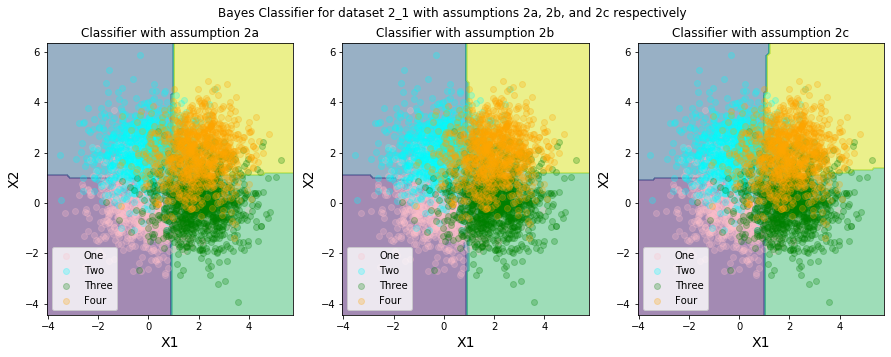

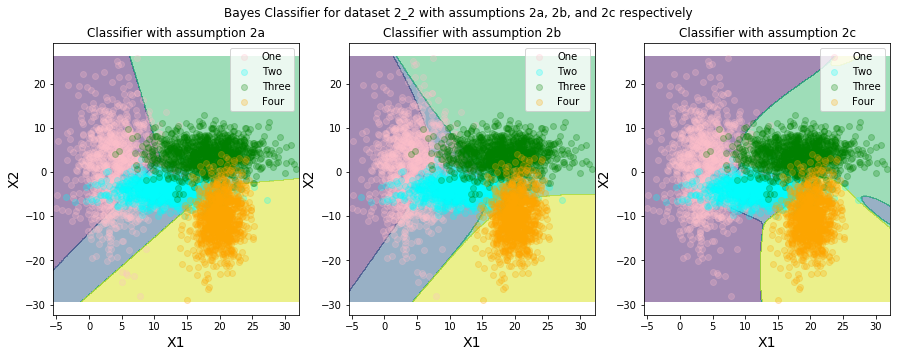

In [26]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

#Loading the dataset
Data1 = np.load('Data/dataset2_1.npz')
X_train1 = Data1['arr_0']
Y_train1 = Data1['arr_1']
X_test1 = Data1['arr_2']
Y_test1 = Data1['arr_3']

Data2 = np.load('Data/dataset2_2.npz')
X_train2 = Data2['arr_0']
Y_train2 = Data2['arr_1']
X_test2 = Data2['arr_2']
Y_test2 = Data2['arr_3']

#Making predicitons
Y_pred_1_1 = Bayes2a(X_train1, Y_train1, X_test1)
Y_pred_1_2 = Bayes2b(X_train1, Y_train1, X_test1)
Y_pred_1_3 = Bayes2c(X_train1, Y_train1, X_test1)
Y_pred_2_1 = Bayes2a(X_train2, Y_train2, X_test2)
Y_pred_2_2 = Bayes2b(X_train2, Y_train2, X_test2)
Y_pred_2_3 = Bayes2c(X_train2, Y_train2, X_test2)

#Separating each class
one_X_train1 = X_train1[Y_train1[:,] == 1]
two_X_train1 = X_train1[Y_train1[:,] == 2]
three_X_train1 = X_train1[Y_train1[:,] == 3]
four_X_train1 = X_train1[Y_train1[:,] == 4]
one_X_train2 = X_train2[Y_train2[:,] == 1]
two_X_train2 = X_train2[Y_train2[:,] == 2]
three_X_train2 = X_train2[Y_train2[:,] == 3]
four_X_train2 = X_train2[Y_train2[:,] == 4]

#Creating a gridspace for plotting decision boundaries
X_axis1, Y_axis1 = np.meshgrid(np.arange(start = X_train1[:, 0].min() - 0.5, stop = X_train1[:, 0].max() + 0.5, step = 0.1),
                     np.arange(start = X_train1[:, 1].min() - 0.5, stop = X_train1[:, 1].max() + 0.5, step = 0.1))
X_axis2, Y_axis2 = np.meshgrid(np.arange(start = X_train2[:, 0].min() - 0.5, stop = X_train2[:, 0].max() + 0.5, step = 0.1),
                     np.arange(start = X_train2[:, 1].min() - 0.5, stop = X_train2[:, 1].max() + 0.5, step = 0.1))

# Figure size
plt.rcParams['figure.figsize'] = [15,5]

#First row of plots (dataset 1)
fig1, ax1 = plt.subplots(nrows=1,ncols=3)

fig1.suptitle('Bayes Classifier for dataset 2_1 with assumptions 2a, 2b, and 2c respectively') 

ax1[0].contourf(X_axis1, Y_axis1, Bayes2a(X_train1, Y_train1, np.array([X_axis1.ravel(), Y_axis1.ravel()]).T).reshape(X_axis1.shape),
             alpha = 0.5)
ax1[0].scatter(one_X_train1[:,0], one_X_train1[:,1], c = 'pink', label = 'One', alpha = 0.25)
ax1[0].scatter(two_X_train1[:,0], two_X_train1[:,1], c = 'cyan', label = 'Two', alpha = 0.25)
ax1[0].scatter(three_X_train1[:,0], three_X_train1[:,1], c = 'green', label = 'Three', alpha = 0.25)
ax1[0].scatter(four_X_train1[:,0], four_X_train1[:,1], c = 'orange', label = 'Four', alpha = 0.25)
ax1[0].set_xlabel('X1',fontsize=14)
ax1[0].set_ylabel('X2',fontsize=14)
ax1[0].title.set_text('Classifier with assumption 2a')
ax1[0].legend()


ax1[1].contourf(X_axis1, Y_axis1, Bayes2b(X_train1, Y_train1, np.array([X_axis1.ravel(), Y_axis1.ravel()]).T).reshape(X_axis1.shape),
             alpha = 0.5)
ax1[1].scatter(one_X_train1[:,0], one_X_train1[:,1], c = 'pink', label = 'One', alpha = 0.25)
ax1[1].scatter(two_X_train1[:,0], two_X_train1[:,1], c = 'cyan', label = 'Two', alpha = 0.25)
ax1[1].scatter(three_X_train1[:,0], three_X_train1[:,1], c = 'green', label = 'Three', alpha = 0.25)
ax1[1].scatter(four_X_train1[:,0], four_X_train1[:,1], c = 'orange', label = 'Four', alpha = 0.25)
ax1[1].set_xlabel('X1',fontsize=14)
ax1[1].set_ylabel('X2',fontsize=14)
ax1[1].title.set_text('Classifier with assumption 2b')
ax1[1].legend()


ax1[2].contourf(X_axis1, Y_axis1, Bayes2c(X_train1, Y_train1, np.array([X_axis1.ravel(), Y_axis1.ravel()]).T).reshape(X_axis1.shape),
             alpha = 0.5)
ax1[2].scatter(one_X_train1[:,0], one_X_train1[:,1], c = 'pink', label = 'One', alpha = 0.25)
ax1[2].scatter(two_X_train1[:,0], two_X_train1[:,1], c = 'cyan', label = 'Two', alpha = 0.25)
ax1[2].scatter(three_X_train1[:,0], three_X_train1[:,1], c = 'green', label = 'Three', alpha = 0.25)
ax1[2].scatter(four_X_train1[:,0], four_X_train1[:,1], c = 'orange', label = 'Four', alpha = 0.25)
ax1[2].set_xlabel('X1',fontsize=14)
ax1[2].set_ylabel('X2',fontsize=14)
ax1[2].title.set_text('Classifier with assumption 2c')
ax1[2].legend()

#Second row of plots (dataset 2)
fig2, ax2 = plt.subplots(nrows=1,ncols=3)

fig2.suptitle('Bayes Classifier for dataset 2_2 with assumptions 2a, 2b, and 2c respectively')

ax2[0].contourf(X_axis2, Y_axis2, Bayes2a(X_train2, Y_train2, np.array([X_axis2.ravel(), Y_axis2.ravel()]).T).reshape(X_axis2.shape),
             alpha = 0.5)
ax2[0].scatter(one_X_train2[:,0], one_X_train2[:,1], c = 'pink', label = 'One', alpha = 0.25)
ax2[0].scatter(two_X_train2[:,0], two_X_train2[:,1], c = 'cyan', label = 'Two', alpha = 0.25)
ax2[0].scatter(three_X_train2[:,0], three_X_train2[:,1], c = 'green', label = 'Three', alpha = 0.25)
ax2[0].scatter(four_X_train2[:,0], four_X_train2[:,1], c = 'orange', label = 'Four', alpha = 0.25)
ax2[0].set_xlabel('X1',fontsize=14)
ax2[0].set_ylabel('X2',fontsize=14)
ax2[0].title.set_text('Classifier with assumption 2a')
ax2[0].legend()


ax2[1].contourf(X_axis2, Y_axis2, Bayes2b(X_train2, Y_train2, np.array([X_axis2.ravel(), Y_axis2.ravel()]).T).reshape(X_axis2.shape),
             alpha = 0.5)
ax2[1].scatter(one_X_train2[:,0], one_X_train2[:,1], c = 'pink', label = 'One', alpha = 0.25)
ax2[1].scatter(two_X_train2[:,0], two_X_train2[:,1], c = 'cyan', label = 'Two', alpha = 0.25)
ax2[1].scatter(three_X_train2[:,0], three_X_train2[:,1], c = 'green', label = 'Three', alpha = 0.25)
ax2[1].scatter(four_X_train2[:,0], four_X_train2[:,1], c = 'orange', label = 'Four', alpha = 0.25)
ax2[1].set_xlabel('X1',fontsize=14)
ax2[1].set_ylabel('X2',fontsize=14)
ax2[1].title.set_text('Classifier with assumption 2b')
ax2[1].legend()


ax2[2].contourf(X_axis2, Y_axis2, Bayes2c(X_train2, Y_train2, np.array([X_axis2.ravel(), Y_axis2.ravel()]).T).reshape(X_axis2.shape),
             alpha = 0.5)
ax2[2].scatter(one_X_train2[:,0], one_X_train2[:,1], c = 'pink', label = 'One', alpha = 0.25)
ax2[2].scatter(two_X_train2[:,0], two_X_train2[:,1], c = 'cyan', label = 'Two', alpha = 0.25)
ax2[2].scatter(three_X_train2[:,0], three_X_train2[:,1], c = 'green', label = 'Three', alpha = 0.25)
ax2[2].scatter(four_X_train2[:,0], four_X_train2[:,1], c = 'orange', label = 'Four', alpha = 0.25)
ax2[2].set_xlabel('X1',fontsize=14)
ax2[2].set_ylabel('X2',fontsize=14)
ax2[2].title.set_text('Classifier with assumption 2c')
ax2[2].legend()



# ## Computing the Confusion matrix

# count11 = 0
# count12 = 0
# count13 = 0
# count14 = 0
# count21 = 0
# count22 = 0
# count23 = 0
# count24 = 0
# count31 = 0
# count32 = 0
# count33 = 0
# count34 = 0
# count41 = 0
# count42 = 0
# count43 = 0
# count44 = 0

# for i in range(len(Y_test1)):
#     if (Y_test2[i]==1) and (Y_pred_2_2[i]==1):
#         count11+=1
#     if (Y_test2[i]==1) and (Y_pred_2_2[i]==2):
#         count12+=1
#     if (Y_test2[i]==1) and (Y_pred_2_2[i]==3):
#         count13+=1
#     if (Y_test2[i]==1) and (Y_pred_2_2[i]==4):
#         count14+=1
#     if (Y_test2[i]==2) and (Y_pred_2_2[i]==1):
#         count21+=1
#     if (Y_test2[i]==2) and (Y_pred_2_2[i]==2):
#         count22+=1
#     if (Y_test2[i]==2) and (Y_pred_2_2[i]==3):
#         count23+=1
#     if (Y_test2[i]==2) and (Y_pred_2_2[i]==4):
#         count24+=1
#     if (Y_test2[i]==3) and (Y_pred_2_2[i]==1):
#         count31+=1
#     if (Y_test2[i]==3) and (Y_pred_2_2[i]==2):
#         count32+=1
#     if (Y_test2[i]==3) and (Y_pred_2_2[i]==3):
#         count33+=1
#     if (Y_test2[i]==3) and (Y_pred_2_2[i]==4):
#         count34+=1
#     if (Y_test2[i]==4) and (Y_pred_2_2[i]==1):
#         count41+=1
#     if (Y_test2[i]==4) and (Y_pred_2_2[i]==2):
#         count42+=1
#     if (Y_test2[i]==4) and (Y_pred_2_2[i]==3):
#         count43+=1
#     if (Y_test2[i]==4) and (Y_pred_2_2[i]==4):
#         count44+=1
        
# #Computing the expected loss
# (L[0,1]*count12+L[0,2]*count13+L[0,3]*count14+
#  L[1,0]*count21+L[1,2]*count23+L[1,3]*count24+
#  L[2,0]*count31+L[2,1]*count32+L[2,3]*count34+
#  L[3,0]*count41+L[3,1]*count42+L[3,2]*count43)/len(Y_test1)

# #Confusion Matrix
# a = np.array([[count11,count12,count13,count14],
#           [count21,count22,count23,count24],
#           [count31,count32,count33,count34],
#           [count41,count42,count43,count44]])/len(Y_test1)
# #Checking if confusion matrix was computed properly and printing the results
# if a.sum() == 1:
#     print(a)

    
    

** Cell type : TextWrite ** 
(Write your observations and table of errors here)
## Observations:
1. From the loss matrix we can notice that the further we move from the correct class, the higher is the loss. There to minimize the loss, predictions will be made in such a way that the farthest error (say, true = 1, predicted =3 OR true =2, predicted =4) is minimized.
2. It can be observed from the confusion matrix obtained that incorporating the loss matrix, indeed reduces the farthest error. We can also see that as we move from assumption 2a to assumption 2c our decision boundaries become more refined (as explained in problem 1).
3. For the dataset 2_1, we can do not observe a good decision boundary. This is because the data given is hard to classify (mixed too much), although if the scatter points were to be removed, we would notice that the decisions boundaries curve at the intersection in an attempt to minimize the loss

# Dataset 2_1
## Confusion Matrix obtained by using classifier 2a

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.15825        | 0.05475       | 0.034         |  0.003      |
|  2             | 0.02425        | 0.1845        | 0.0155        |  0.02575    |
|  3             | 0.0215         | 0.01225       | 0.1925        |  0.02375    |
|  4             | 0.00375        | 0.034         | 0.0485        |  0.16375    |

## Confusion Matrix obtained by using classifier 2b

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.11575        | 0.097        | 0.03625         |  0.001      |
|  2             | 0.01075        | 0.19775        | 0.02825        |  0.01325    |
|  3             | 0.01         | 0.02375       | 0.2045        |  0.01175    |
|  4             | 0.001        | 0.03725         | 0.0865        |  0.12525    |

## Confusion Matrix obtained by using classifier 2c

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.15825        | 0.0545       | 0.0345         |  0.00275      |
|  2             | 0.02475        | 0.1855        | 0.01525        |  0.0245     |
|  3             | 0.02175         | 0.01175       | 0.193        |  0.0235     |
|  4             | 0.00375        | 0.0335         | 0.05025        |  0.1625    |


# Dataset 2_2
## Confusion Matrix obtained by using classifier 2a


| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.2075        | 0.0375       | 0.0045         |  0.0005      |
|  2             | 0.02325        | 0.196        | 0.0115        |  0.01925    |
|  3             | 0.0075         | 0.01525       | 0.22625        |  0.001    |
|  4             | 0.        | 0.00575         | 0.0195        |  0.22475    |

## Confusion Matrix obtained by using classifier 2b


| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.16875        | 0.0755        | 0.00575         |  0.      |
|  2             | 0.00975        | 0.18725        | 0.05125        |  0.00175    |
|  3             | 0.00175         | 0.0295       | 0.21875        |  0.    |
|  4             | 0.        | 0.00075         | 0.07425        |  0.175    |

## Confusion Matrix obtained by using classifier 2c

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.22525        | 0.02       | 0.00475         |  0.      |
|  2             | 0.016        | 0.206        | 0.01175        |  0.01625    |
|  3             | 0.00475         | 0.00775       | 0.234        |  0.0035    |
|  4             | 0.        | 0.009         | 0.012        |  0.229    |


## Expected Loss
| Dataset\Assumption | Classifier 2a  | Classifier 2b | Classifier 2c |
| :---:              | :-------------:|:-----------:  |      :------: |
| Dataset 1          | 0.42975        | 0.4575        | 0.428         |
| Dataset 2          | 0.1835         | 0.26025       | 0.1405        |



**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


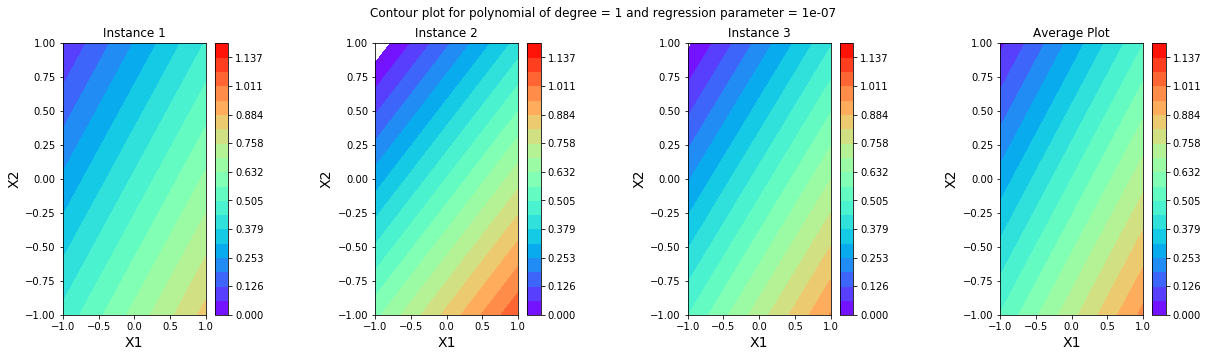

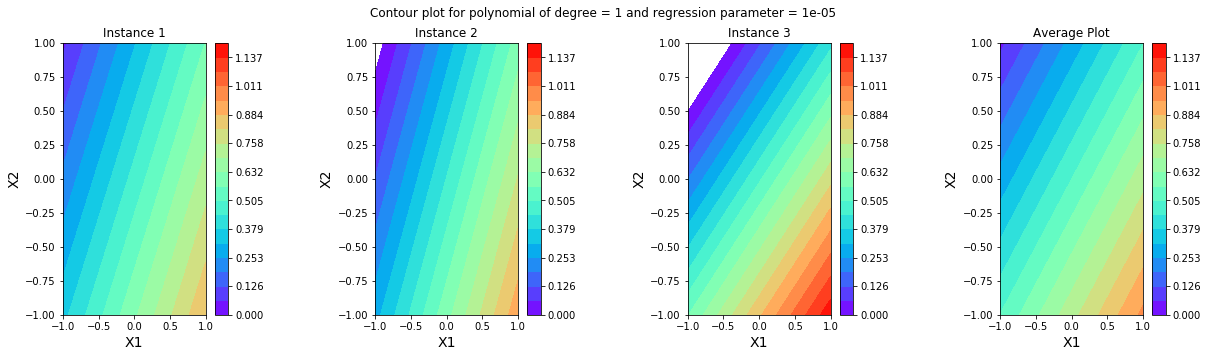

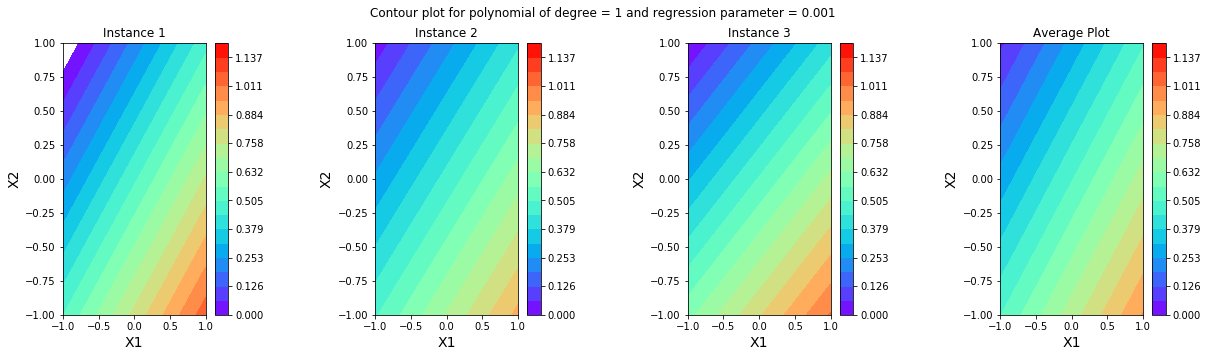

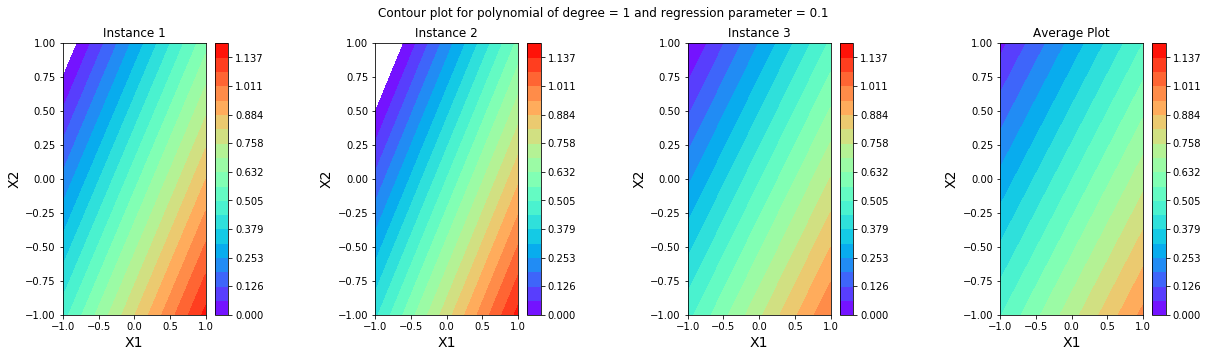

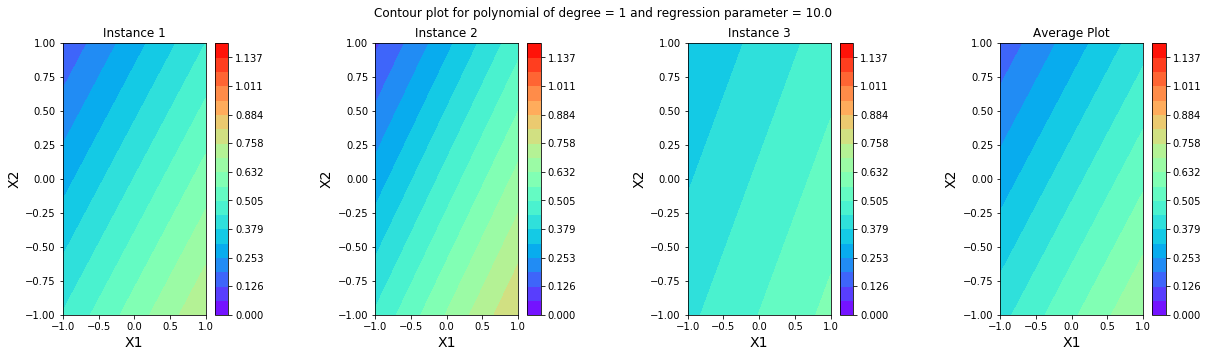

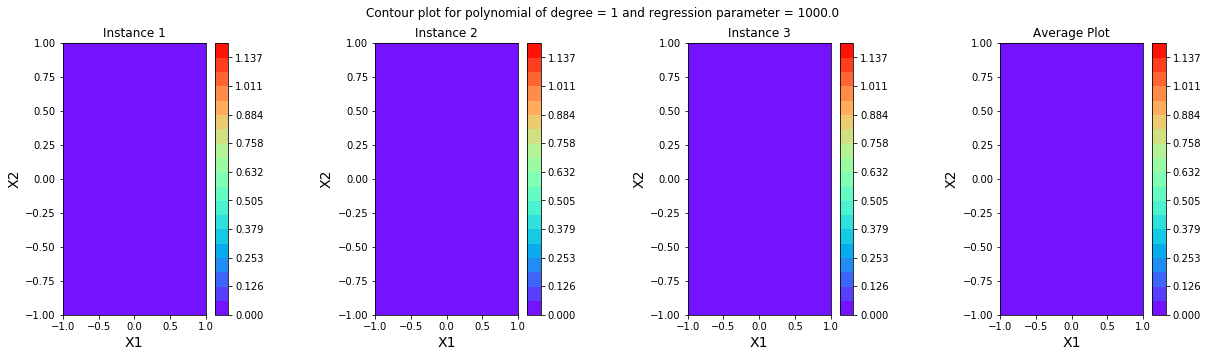

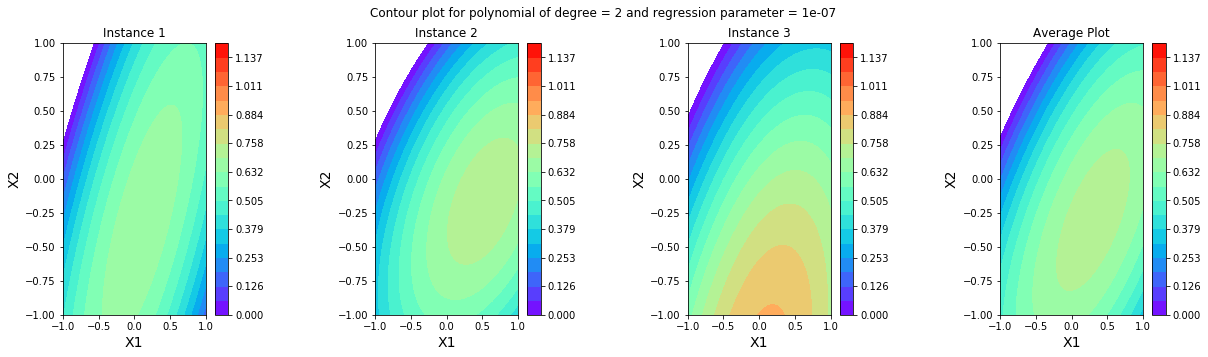

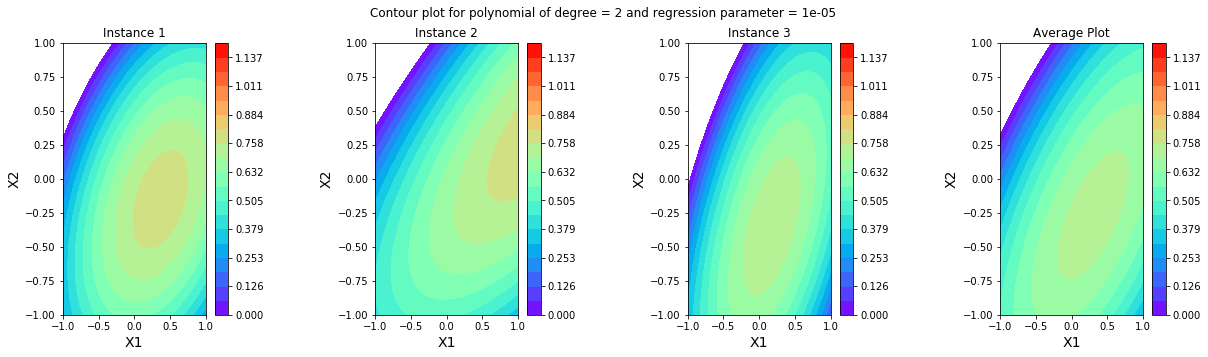

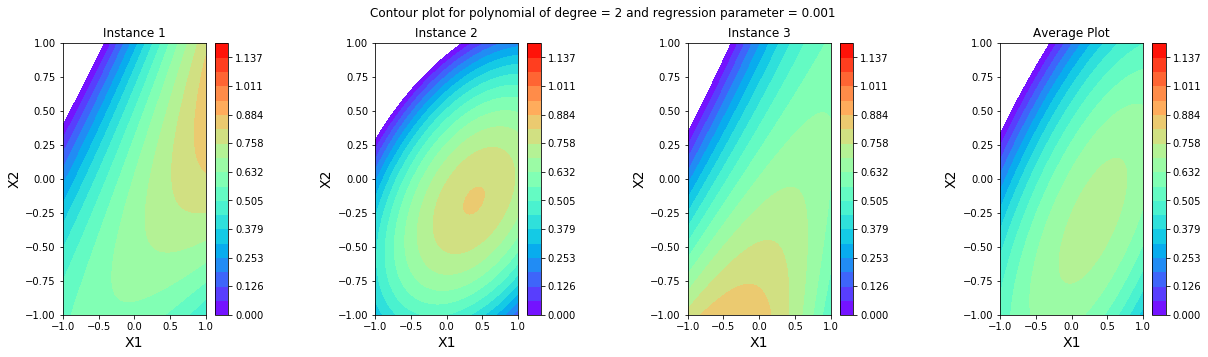

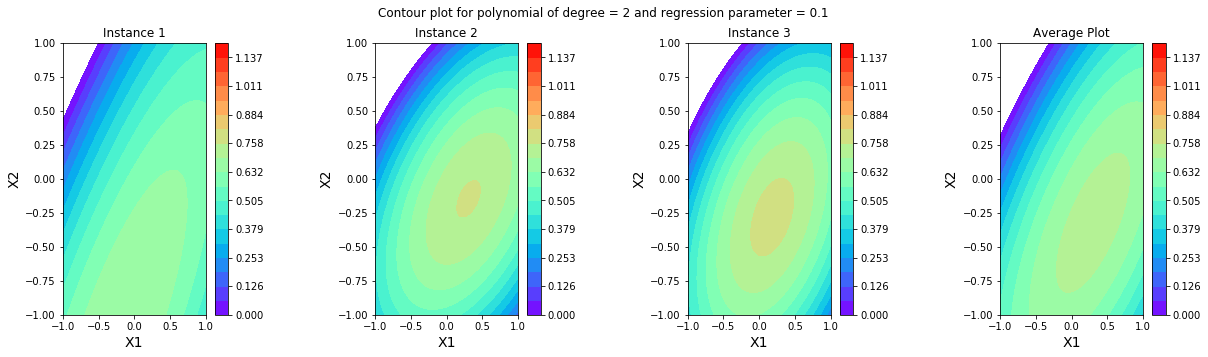

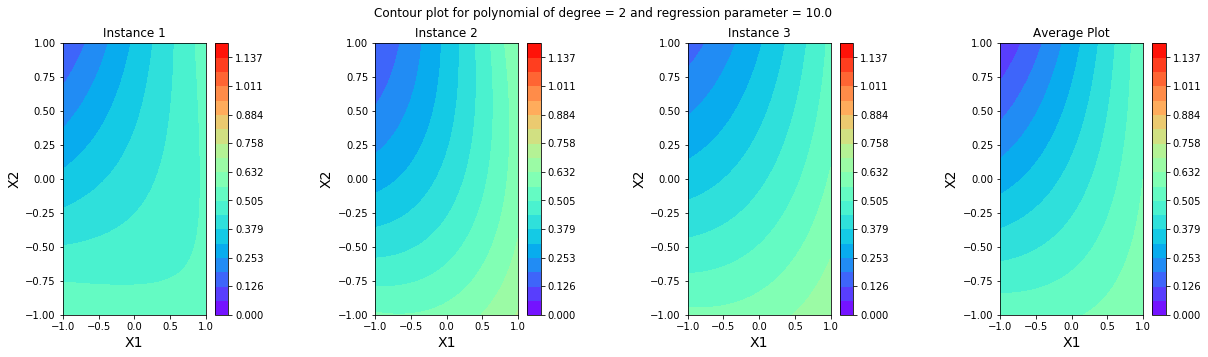

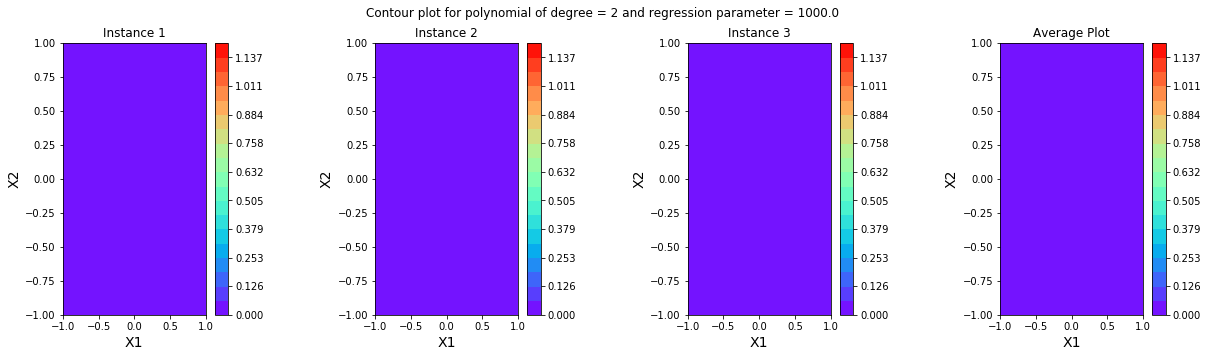

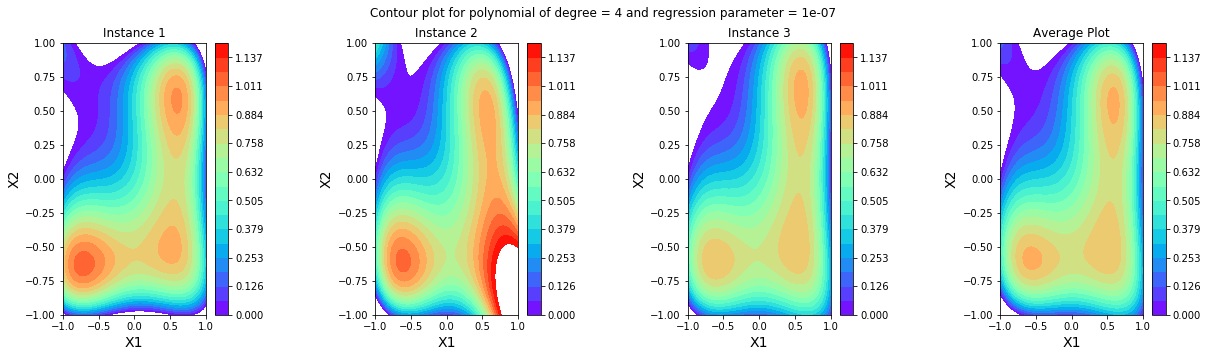

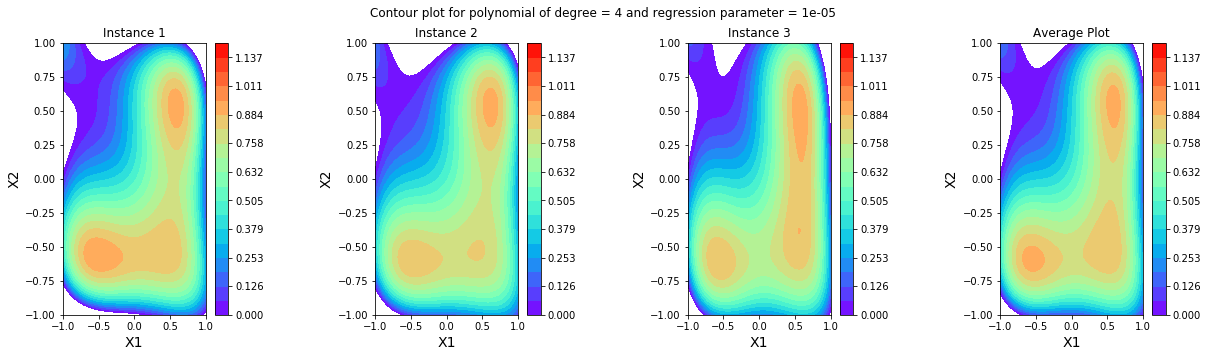

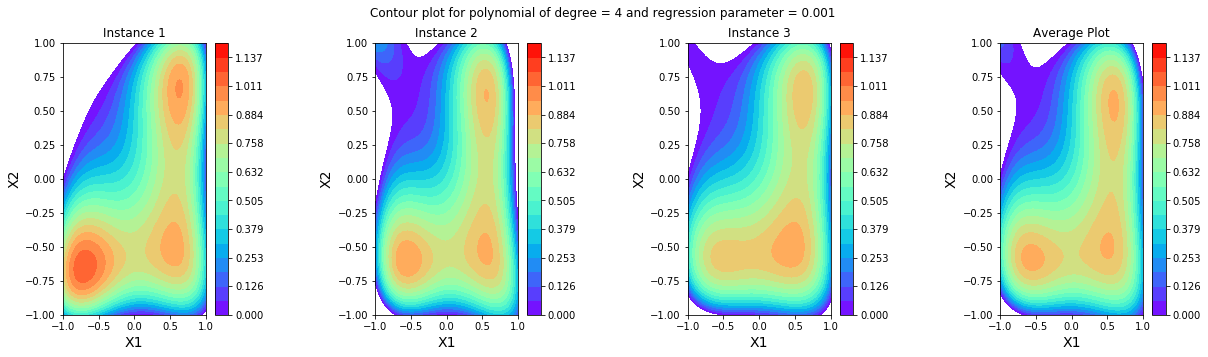

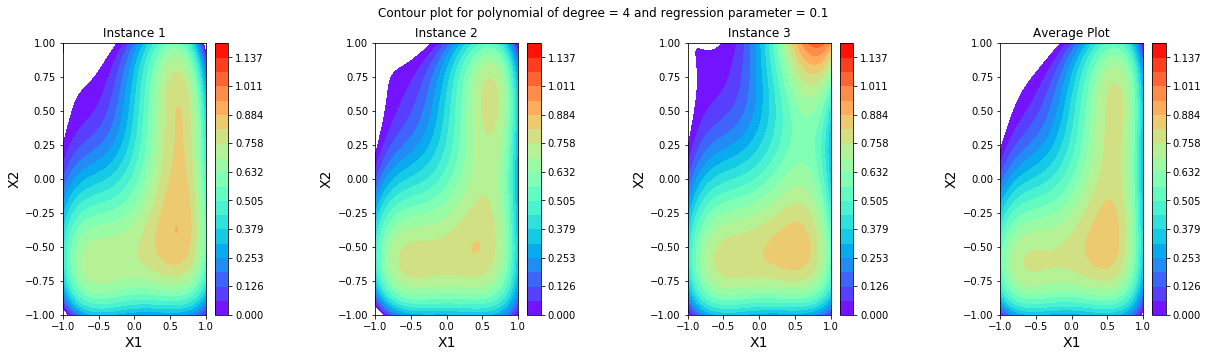

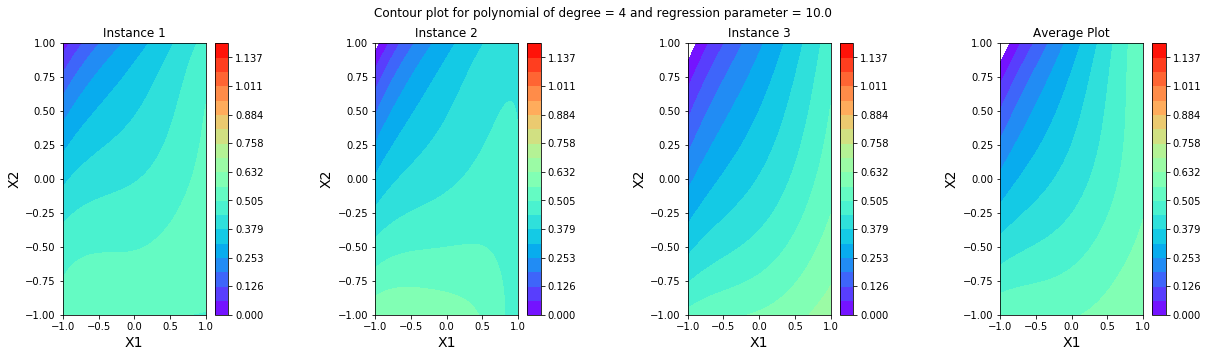

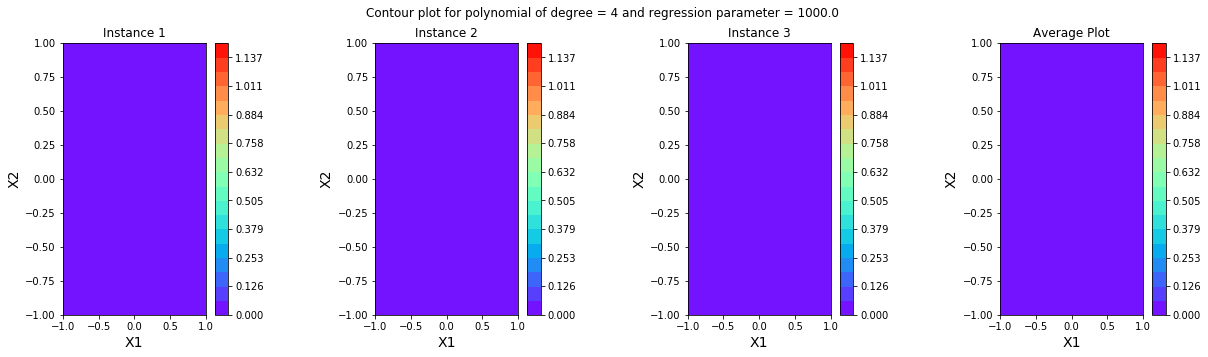

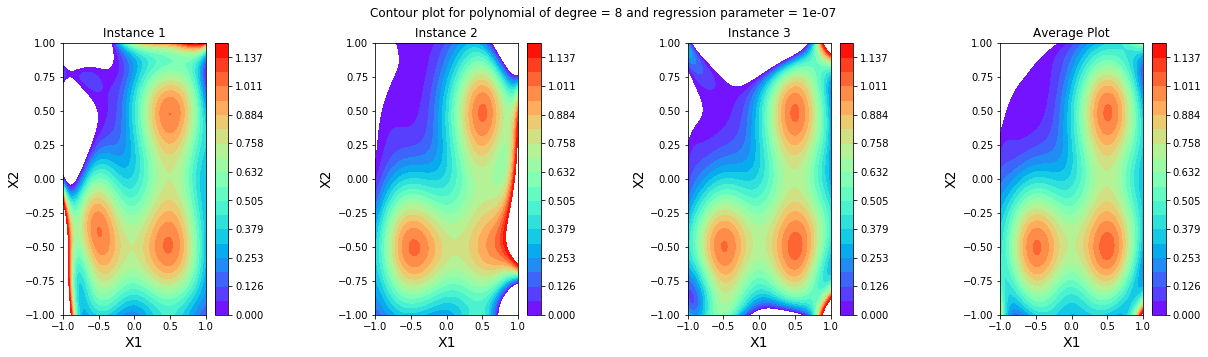

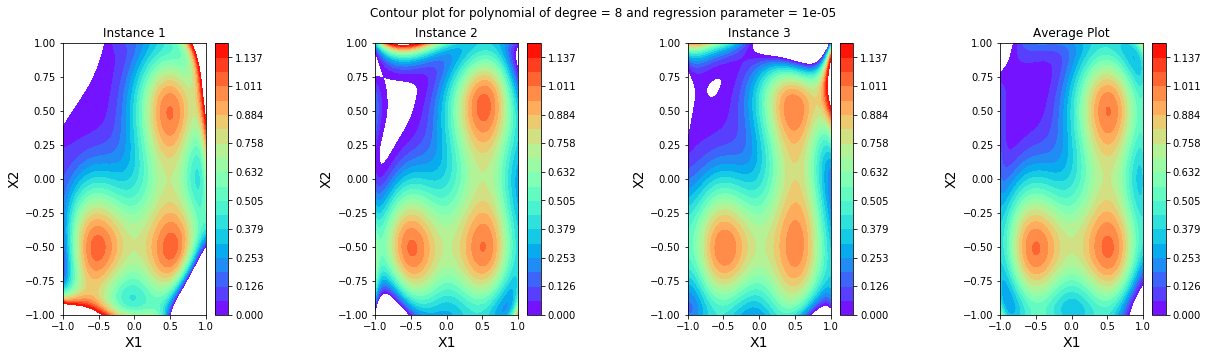

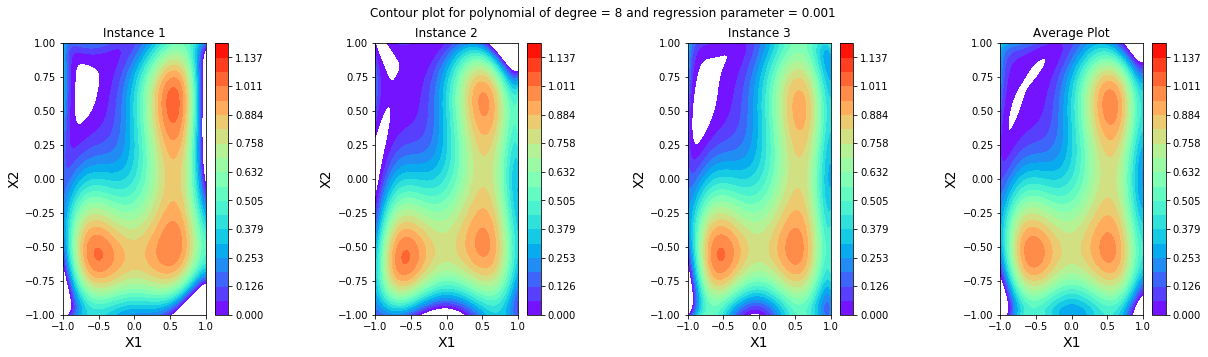

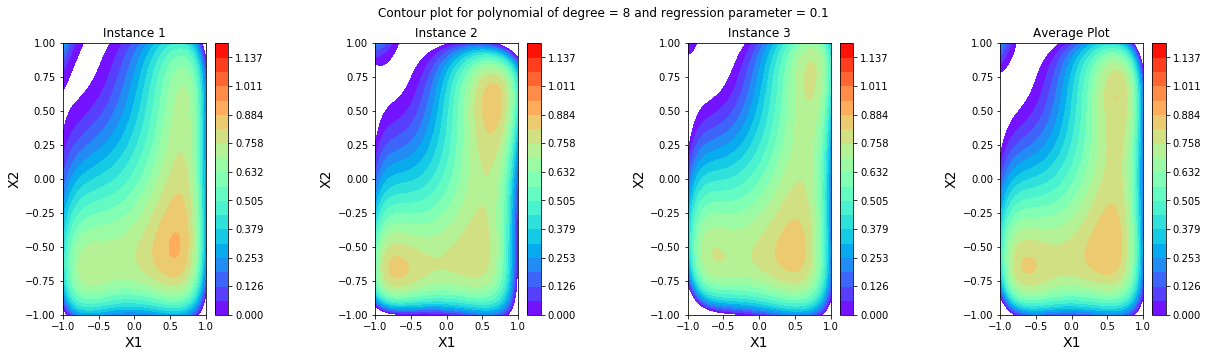

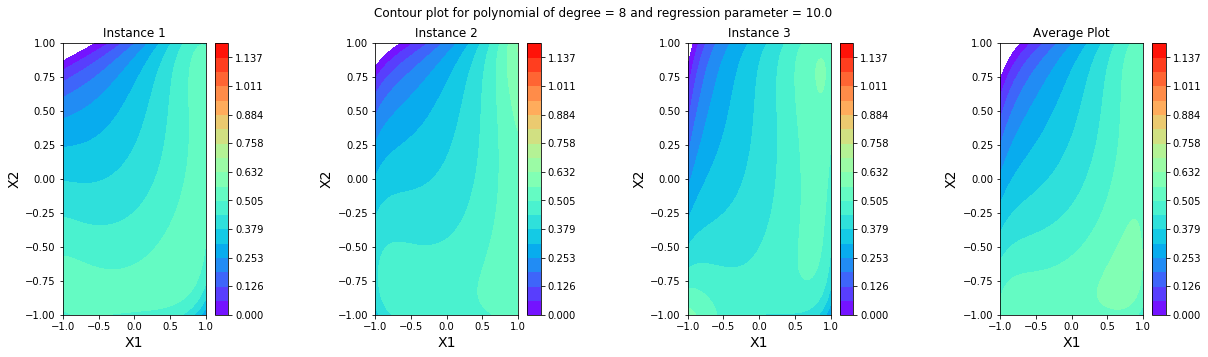

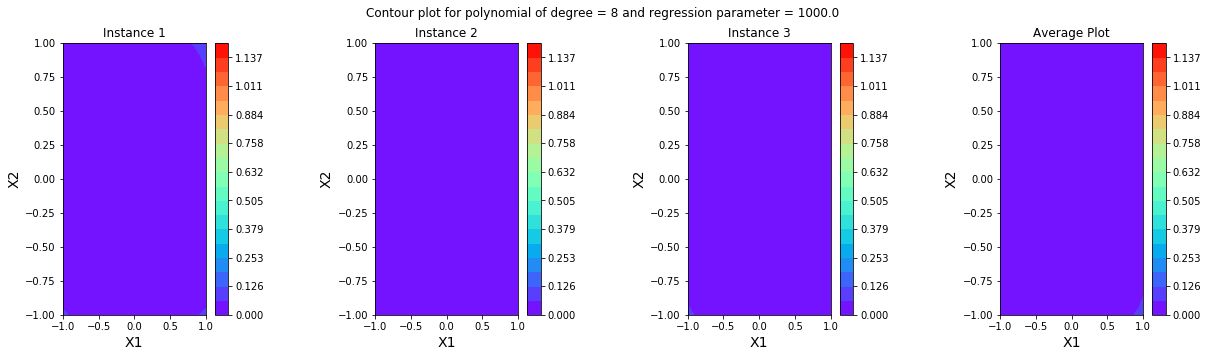

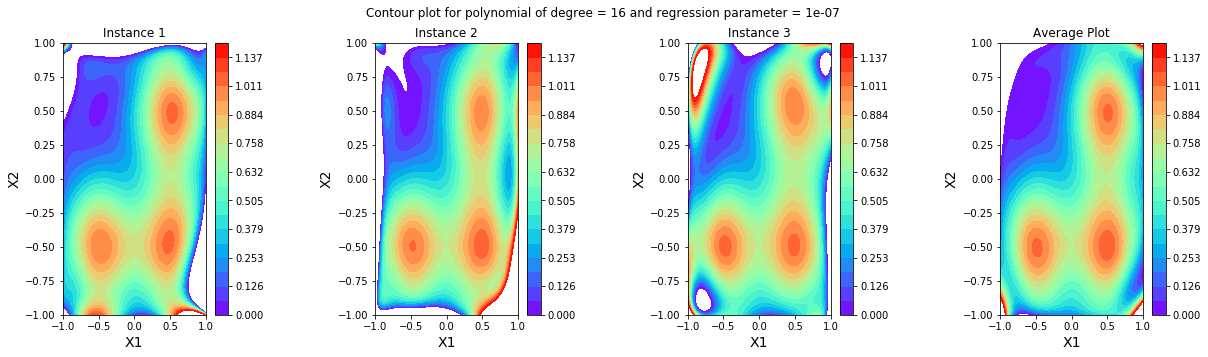

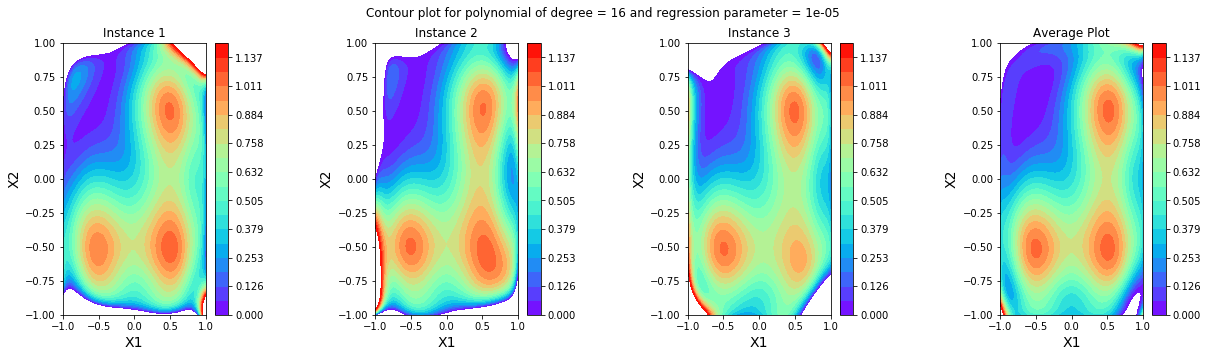

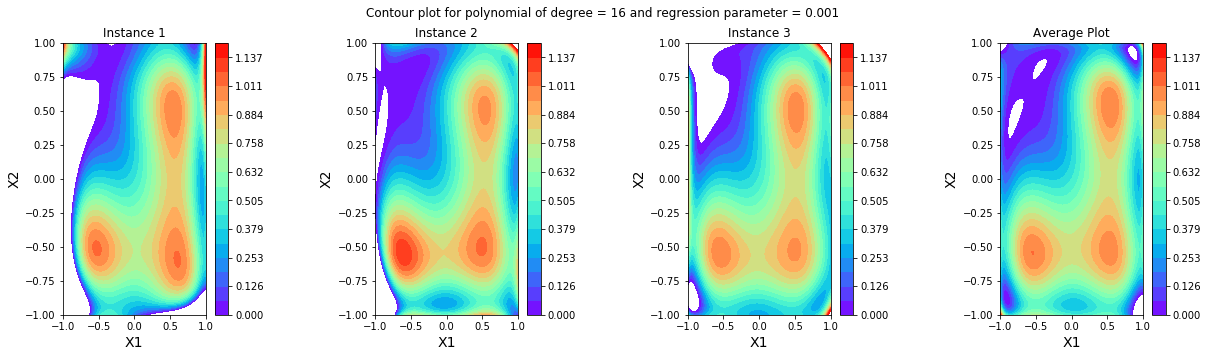

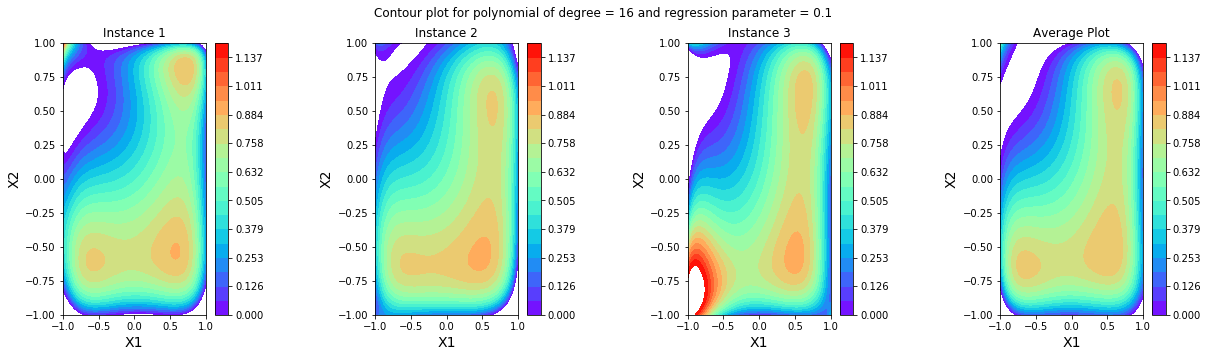

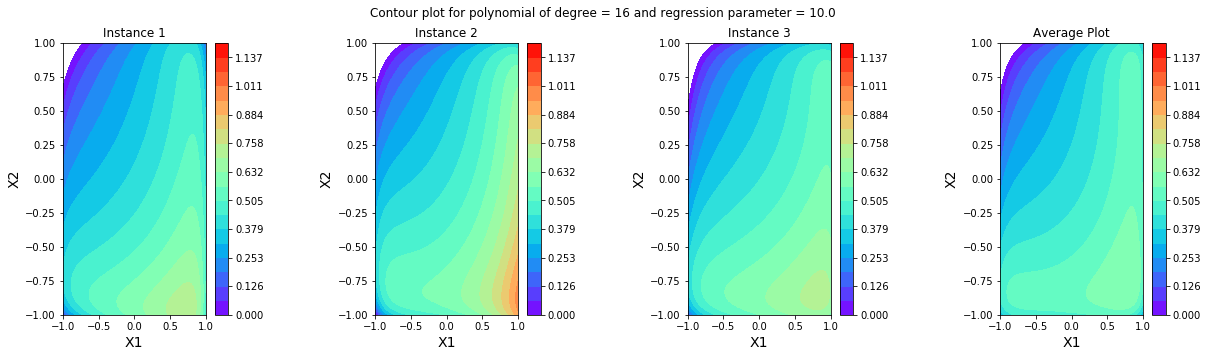

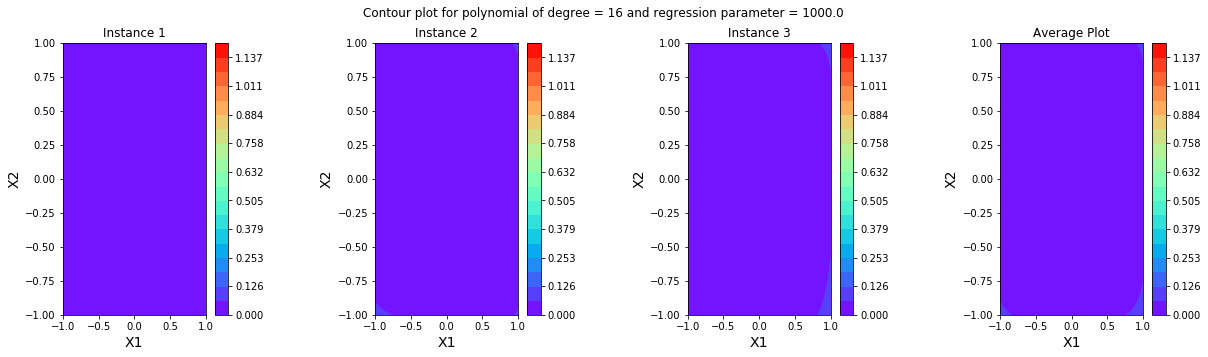

In [27]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    # Feature matrix
    phi=[]
    for i in range(degree+1):
        for j in range(degree+1):
            if (i+j) <= degree:
                phi.append((X_test[:,0]**i)*(X_test[:,1]**j))
    phi = np.array(phi).T
    
    #Making predictions
    Y_test_pred = np.matmul(phi,wt_vector)
    
    return Y_test_pred
    

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    Z = np.zeros([100,100])
    for i in range(len(X)):
        Z[i,:] = polynomial_regression_ridge_pred(np.array([X[i,:],Y[i,:]]).T, wt_vector, degree)
    
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),cmap=plt.cm.rainbow)
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    #Feature matrix
    phi=[]
    for i in range(degree+1):
        for j in range(degree+1):
            if (i+j) <= degree:
                phi.append((X_train[:,0]**i)*(X_train[:,1]**j))
    phi = np.array(phi).T
    
    #Calculating weight vector
    K = np.matmul(phi,phi.T)
    I = np.identity(K.shape[0])
    w = np.matmul(np.matmul(phi.T,np.linalg.inv((K+reg_param*I))),Y_train)
    
    return w
    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    #Function to generate data
    def y(x):
        return np.exp(-4*np.linalg.norm(x-a)**2)+np.exp(-4*np.linalg.norm(x-b)**2)+np.exp(-4*np.linalg.norm(x-c)**2)
    
    a = np.array([0.5,0.5])
    b = np.array([-0.5,-0.5])
    c = np.array([0.5,-0.5])
    #Uniform distribution of x
    x = np.linspace(-1,1,10000)
    #Taking the whole space as the test data
    X_test = np.array([x,x]).T
    
    #Calculating the true outcome for the test data
    Y_true = np.zeros(len(x))
    for i in range(len(x)):
        Y_true[i] = y([x[i],x[i]])
    
    #Initializing arrays to get the solution
    var = np.zeros(100)
    bias_squared = np.zeros(10000)
    mse = np.zeros(100)
    Y_test_pred = np.zeros((10000,100))
    
    
    for j in range(100):
        #Generating random training dataset
        x1 = np.random.choice(x, size = num_training_samples)
        x2 = np.random.choice(x, size = num_training_samples)
        X_train = np.array([x1,x2]).T
        
        #Calculating the true outcome for the training data 
        Y_train = np.zeros(len(x1))
        for i in range(len(x1)):
            Y_train[i] = y([x1[i],x2[i]])
            
        
        wt_vector = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        Y_test_pred[:,j] = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
        
        #Calculating the MSE and Variance
        mse[j] = ((Y_true-Y_test_pred[:,j])**2).mean()
        var[j] = ((Y_test_pred[:,j]-Y_test_pred.mean(axis=1))**2).mean()
        
        #Plotting
        if j == 0:
            wt_avg = np.zeros([wt_vector.shape[0]])
        wt_avg+=wt_vector
        
        if (j == 1) or (j == 2) or (j == 3):
            plt.subplot(1,4,j)
            visualise_polynomial_2d(wt_vector,degree,title = "Instance "+str(j))
            plt.xlabel('X1',fontsize=14)
            plt.ylabel('X2',fontsize=14)
        
        #Plotting with avg weight vector
        if j == 99:
            plt.subplot(1,4,4)
            avg_wt = (wt_avg)/100
            visualise_polynomial_2d(avg_wt,degree,title="Average Plot")
            plt.xlabel('X1',fontsize=14)
            plt.ylabel('X2',fontsize=14)
            
    #Calculating the Bias-Sqaured
    bias_squared = ((Y_test_pred.mean(axis=1) - Y_true)**2).mean()
    
    
    return np.sqrt(bias_squared), var.mean(), mse.mean()
        


for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        
        plt.rcParams['figure.figsize'] = [20,5]
        fig = plt.figure()
        fig.suptitle('Contour plot for polynomial of degree = '+str(degree)+' and regression parameter = '+str(reg_param))
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        plt.subplots_adjust(wspace = 0.75, hspace = 0)
        
#         print('================================')
#         print('Degree= '+str(degree)+' lambda= '+str(reg_param))
#         print('Bias = '+str(b))
#         print('Variance = '+str(v))
#         print('MSE = '+str(e))



In [28]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.
## Observations: 

1. As per the standard norm, bias should decrease as degree increases and the variance should increase as degree increases (for a fixed $\lambda$). This can be observed in the values obtained (with a few exceptions). The exceptions could be possible because X varies uniformly between [-1,1]x[-1,1]. When we taylor expand the true function, we can approaximate it to be a polynomial equation because X is small (higher powers can be ignored). 

2. A low variance and a high bias would indicate that the data does not vary much with the input but the value that is get is far from the true value. A case of high vairance and low bias indicates that the predicted function is close to the true function but the data varies a lot about that function. Therefore looking at only bias or only variace is not enough to determine the goodness of the fit. This brings us to MSE which is a sum of bias-square and variance.  

## Bias:
| Degree\ $\lambda$ |  1e-7    |  1e-5   |  1e-3   | 1e-1   | 1e1    | 1e3         | 
| :---:             | :-----:  |:----:   |:----:   |:----:  |:---:   |:---:        |
|  1                | 0.305681 | 0.303262|0.306195 |0.306701|0.352426|0.684076     |
|  2                | 0.250803 | 0.249673|0.249850 |0.254099|0.352637|0.680659     |
|  4                | 0.170671 | 0.194739|0.176972 |0.152613|0.348858|0.678758     |
|  8                | 0.075407 | 0.081637|0.134330 |0.184941|0.338734|0.678618     |
|  16               | 0.421705 | 0.255939|0.148066 |0.250436|0.323286|0.678176     |



## Variances:
| Degree\ $\lambda$ |  1e-7    |  1e-5   |  1e-3   | 1e-1   | 1e1    | 1e3       | 
| :---:             | :-----:  |:----:   |:----:   |:----:  |:---:   |:---:      |
|  1                | 0.086629 | 0.087691|0.085826 |0.085360|0.060196|0.000185   |
|  2                | 0.127128 | 0.137375|0.133760 |0.129079|0.070463|0.000276   |
|  4                | 0.170671 | 0.174427|0.170318 |0.142073|0.072829|0.000350   |
|  8                | 0.812246 | 0.241665|0.246762 |0.160541|0.075894|0.000394   |
|  16               | 1.448683 | 0.665703|0.385937 |0.184946|0.076499|0.000440   |


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




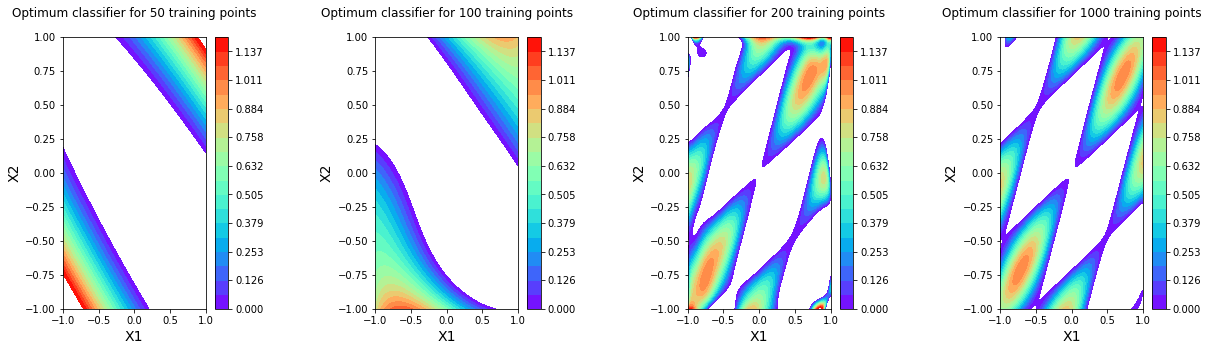

In [29]:
# Cell type : CodeWrite 

#Loading the dataset
Data = np.load('Data/dataset4_1.npz')

X_train = Data['arr_0']
Y_train = Data['arr_1']
X_test = Data['arr_2']
Y_test = Data['arr_3']

#All possibles values for degree and reg_param
deg = [1,2,4,8,16]
lamda = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

#Training dataset with different number of samples
X_train1 = X_train[:50,:]
Y_train1 = Y_train[:50]

X_train2 = X_train[:100,:]
Y_train2 = Y_train[:100]

X_train3 = X_train[:200,:]
Y_train3 = Y_train[:200]

X_train4 = X_train[:1000,:]
Y_train4 = Y_train[:1000]

#Initialising the MSE matrix
mse1 = np.zeros([len(deg),len(lamda)])
mse2 = np.zeros([len(deg),len(lamda)])
mse3 = np.zeros([len(deg),len(lamda)])
mse4 = np.zeros([len(deg),len(lamda)])
mse5 = np.zeros([len(deg),len(lamda)])
mse6 = np.zeros([len(deg),len(lamda)])
mse7 = np.zeros([len(deg),len(lamda)])
mse8 = np.zeros([len(deg),len(lamda)])

#Calculating MSE for each combination of degree and reg_param
for i in range(len(deg)):
    for j in range(len(lamda)):
        
        degree = deg[i]
        reg_param = lamda[j]
        
        # Testing MSE
        
        wt_vector1 = polynomial_regression_ridge_train(X_train1,Y_train1,degree,reg_param)
        Y_test_pred1 = polynomial_regression_ridge_pred(X_test,wt_vector1,degree)
        mse1[i,j] = ((Y_test_pred1 - Y_test)**2).mean()
        
        wt_vector2 = polynomial_regression_ridge_train(X_train2,Y_train2,degree,reg_param)
        Y_test_pred2 = polynomial_regression_ridge_pred(X_test,wt_vector2,degree)
        mse2[i,j] = ((Y_test_pred2 - Y_test)**2).mean()
        
        wt_vector3 = polynomial_regression_ridge_train(X_train3,Y_train3,degree,reg_param)
        Y_test_pred3 = polynomial_regression_ridge_pred(X_test,wt_vector3,degree)
        mse3[i,j] = ((Y_test_pred3 - Y_test)**2).mean()
        
        wt_vector4 = polynomial_regression_ridge_train(X_train4,Y_train4,degree,reg_param)
        Y_test_pred4 = polynomial_regression_ridge_pred(X_test,wt_vector4,degree)
        mse4[i,j] = ((Y_test_pred4 - Y_test)**2).mean()
        
        # Training MSE
        
        wt_vector5 = polynomial_regression_ridge_train(X_train1,Y_train1,degree,reg_param)
        Y_test_pred5 = polynomial_regression_ridge_pred(X_train,wt_vector5,degree)
        mse5[i,j] = ((Y_test_pred5 - Y_train)**2).mean()
        
        wt_vector6 = polynomial_regression_ridge_train(X_train2,Y_train2,degree,reg_param)
        Y_test_pred6 = polynomial_regression_ridge_pred(X_train,wt_vector6,degree)
        mse6[i,j] = ((Y_test_pred6 - Y_train)**2).mean()
        
        wt_vector7 = polynomial_regression_ridge_train(X_train3,Y_train3,degree,reg_param)
        Y_test_pred7 = polynomial_regression_ridge_pred(X_train,wt_vector7,degree)
        mse7[i,j] = ((Y_test_pred7 - Y_train)**2).mean()
        
        wt_vector8 = polynomial_regression_ridge_train(X_train4,Y_train4,degree,reg_param)
        Y_test_pred8 = polynomial_regression_ridge_pred(X_train,wt_vector8,degree)
        mse8[i,j] = ((Y_test_pred8 - Y_train)**2).mean()
        
# print('================================')
# print('50 Points')
# print('\n')
# print('MSE TEST')
# print(mse1)
# print('\n')
# print('MSE TRAIN')
# print(mse5)
# print('\n')
# print(int(np.floor(mse1.argmin()/6)), mse1.argmin()%6)
# print('================================')
# print('100 Points')
# print('\n')
# print('MSE TEST')
# print(mse2)
# print('\n')
# print('MSE TRAIN')
# print(mse6)
# print('\n')
# print(int(np.floor(mse2.argmin()/6)), mse2.argmin()%6)
# print('================================')
# print('200 Points')
# print('\n')
# print('MSE TEST')
# print(mse3)
# print('\n')
# print('MSE TRAIN')
# print(mse7)
# print('\n')
# print(int(np.floor(mse3.argmin()/6)), mse3.argmin()%6)
# print('================================')
# print('1000 Points')
# print('\n')
# print('MSE TEST')
# print(mse4)
# print('\n')
# print('MSE TRAIN')
# print(mse8)
# print('\n')
# print(int(np.floor(mse4.argmin()/6)), mse4.argmin()%6)
# print('================================')

        
#calculating the weight vector for the optimum classifier for different datasets     
wt_vector1_optimum = polynomial_regression_ridge_train(X_train1, Y_train1, 2, 1e-1)
wt_vector2_optimum = polynomial_regression_ridge_train(X_train2, Y_train2, 4, 1e-7)
wt_vector3_optimum = polynomial_regression_ridge_train(X_train3, Y_train3, 16, 1e-9)
wt_vector4_optimum = polynomial_regression_ridge_train(X_train4, Y_train4, 16, 1e-9)

#Figure size
plt.rcParams['figure.figsize'] = [20,5]

#Plotting
fig = plt.figure()

plt.subplot(1,4,1)
visualise_polynomial_2d(wt_vector1_optimum, 2)
plt.title('Optimum classifier for 50 training points', pad=20)
plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)

plt.subplot(1,4,2)
visualise_polynomial_2d(wt_vector2_optimum, 4, title="Optimum classifier for 100 training points")
plt.title('Optimum classifier for 100 training points', pad=20)
plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)

plt.subplot(1,4,3)
visualise_polynomial_2d(wt_vector3_optimum, 16, title="Optimum classifier for 200 training points")
plt.title('Optimum classifier for 200 training points', pad=20)
plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)
plt.subplot(1,4,4)

visualise_polynomial_2d(wt_vector4_optimum, 16, title="Optimum classifier for 1000 training points")
plt.title('Optimum classifier for 1000 training points', pad=20)
plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)
        
plt.subplots_adjust(wspace = 0.75)        

        

** Cell type : TextWrite **

## Observations: 
1. As the training data increases in size, the model is able to learn better (better generalizability). This can be observed by a decrese in test MSE observed over various training datasets. The MSE for the best classifier of each case (50, 100, 200, and 1000 datapoints) has been bolded in the table along with the corresponding training MSE. 
2. Having a lower testing MSE is usually not used to determine how well a curve fits. This is because we can run into the case of overfitting where we can achieve extremely low values of MSE for the training data but the function obtained will not give a good generalization for the rest of the data.


## Training with 50 datapoints:

### Test MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             |   :-----:  |:----:     |  :----:   |  :----:   |  :---:    |  :---:        |
|  1                | 0.3012667 | 0.3012668|0.3012667 |0.3012624 |0.3008382 |0.2783506     |
|  2                | 0.1578999 | 0.1578998|0.1578998 |0.1578863 |0.1567352|0.2082236     |
|  4                | 0.1573339 | 0.1573339|0.1573329 |0.1572427 |0.1618263 |0.2082236     |
|  8                | 0.2376e+03 | 0.1725e+03|0.1859+e02 |0.9902507 |0.1651557 |0.1939185     |
|  16               | 0.2505e+03 | 0.2320e+03|0.6669+e02 |2.3373084 |0.2039614 |0.1960573     |



### Train MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |:----:     |:----:     |:----:     | :---:     |:---:          |
|  1                | 0.27426128 | 0.27426132|0.27426189 |0.27425742 | 0.27387387|0.2538510     |
|  2                | 0.15639985 | 0.15639985|0.15639964 |0.15638070 | 0.1547003|0.1915057     |
|  4                | 0.1554163 | 0.1554162|0.1554153 |0.155311 | 0.15767|0.18084     |
|  8                | 184.691 | 131.838|14.14 |0.78045 | 0.1614|0.1784     |
|  16               | 195.674 | 172.67|49.58 |1.83051 | 0.19669|0.18027     |


## Training with 100 datapoints:


### Test MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |:----:     |:----:     | :----:    | :---:     |:---:          |
|  1                | 0.27314881 | 0.27314864|0.27314863 | 0.27314798| 0.27308304|0.26862154     |
|  2                | 0.1532099 | 0.15320993|0.1532099 | 0.15320678| 0.15291576|0.17570948     |
|  4                | 0.14277585 | 0.14277575|0.14277607 | 0.14280764| 0.14602043|0.16898019     |
|  8                | 0.71291665 | 0.71131964|0.58075914 | 0.20363826| 0.16262758|0.17116844     |
|  16               | 54.08000973 | 11.77041999|23.41658886 | 0.41784851| 0.18835914|0.17415997     |

### Train MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |:----:     |:----:     |:----:     | :---:     |:---:          |
|  1                | 0.24924468 | 0.2492446|0.2492446 |0.24924403 | 0.24918733|0.2453317     |
|  2                | 0.15034659 | 0.1503466|0.15034655 |0.15034165 | 0.14987479|0.16364578     |
|  4                | 0.14219318 | 0.14219308|0.14219312 |0.14219808 | 0.14343342|0.15771009     |
|  8                | 0.5826159 | 0.58134699|0.47778596 |0.17302199 | 0.15362974|0.15941299     |
|  16               | 40.88530255 | 6.4214023|8.54493033 |0.27611186 | 0.17611051|0.16158112     |



## Training with 200 datapoints:


### Test MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    | :----:    | :----:    | :----:    | :---:     | :---:         |
|  1                | 0.2676629 | 0.26766305|0.26766305 |0.26766288 |0.26764571 |0.26622547     |
|  2                | 0.14578072 | 0.14578065|0.14578065 |0.14578035 |0.14575448 |0.15868223     |
|  4                | 0.13117103 | 0.13117097|0.1311709 |0.13116415 |0.13083053 |0.15708512     |
|  8                | 0.13736248 | 0.13735918|0.13698205 |0.11818259 |0.11396536 |0.15645118     |
|  16               | 0.03715041 | 0.08371022|0.17080666 |0.0869037 |0.11121403 |0.15224401     |


### Train MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |  :----:   |  :----:   |  :----:   |   :---:   |  :---:        |
|  1                | 0.24607245 | 0.24607271|0.24607272 | 0.24607257| 0.24605756|0.24480824     |
|  2                | 0.14273851 | 0.1427385|0.14273849 | 0.14273747| 0.14263977|0.15041158     |
|  4                | 0.13227258 | 0.13227259|0.13227243 | 0.13225662| 0.13110941|0.14861957     |
|  8                | 0.11277981 | 0.11277783|0.11256118 | 0.10231635| 0.11410717|0.1477115     |
|  16               | 0.01853434 | 0.03777313|0.05960355 | 0.07405987| 0.108204|0.14398146     |

## Training with 1000 datapoints:

### Test MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    | :----:    | :----:    | :----:    |  :---:    | :---:         |
|  1                | 0.2625346 | 0.26253465|0.26591434 |0.26253465 | 0.2625346|0.2625303     |
|  2                | 0.1424292 | 0.14242932|0.14242932 |0.14242945 | 0.14244207|0.14451885     |
|  4                | 0.12707961 | 0.12707963|0.12707964 |0.12708121 | 0.12724209|0.14093659     |
|  8                | 0.08481384 | 0.08481261|0.08480025 |0.08391324 | 0.09782269|0.13498892     |
|  16               | 0.00119791 | 0.00149006|0.01095719 |0.04965813 | 0.0907374|0.1278209     |

### Train MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |  :----:   |  :----:   |  :----:   |   :---:   |  :---:        |
|  1                | 2.40728219e-01 | 2.40728219e-01|2.40728219e-01 |2.40728219e-01 | 2.40728219e-01|2.40728718e-01     |
|  2                | 1.38824103e-01 | 1.38824103e-01|1.38824103e-01 |1.38824103e-01 | 1.38824212e-01|1.39718023e-01     |
|  4                | 1.25017242e-01 | 1.25017242e-01|1.25017242e-01 |1.25017243e-01 | 1.25025116e-01|1.34172029e-01     |
|  8                | 7.67428545e-02 |7.67428535e-02|7.67428671e-02 |7.68462164e-02 | 9.48380319e-02|1.28438228e-01     |
|  16               | 2.54867334e-05 | 4.45126848e-04|6.53349064e-03 |3.84153399e-02 | 8.49925763e-02|1.21687324e-01     |

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












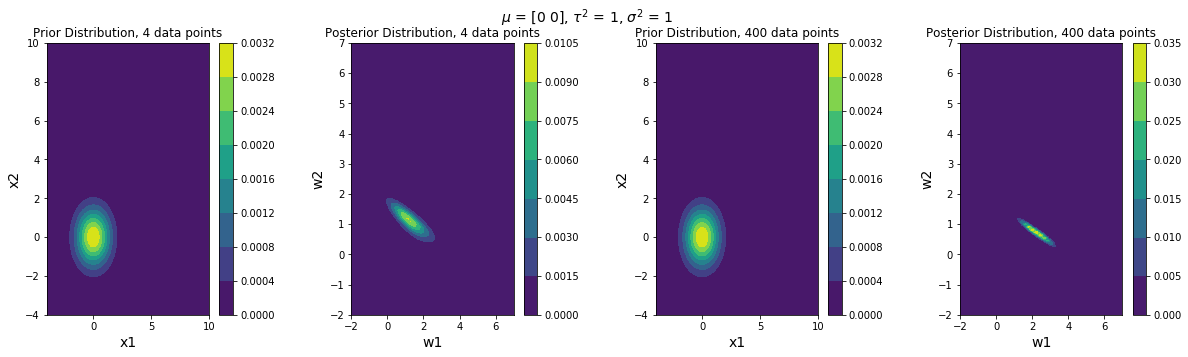

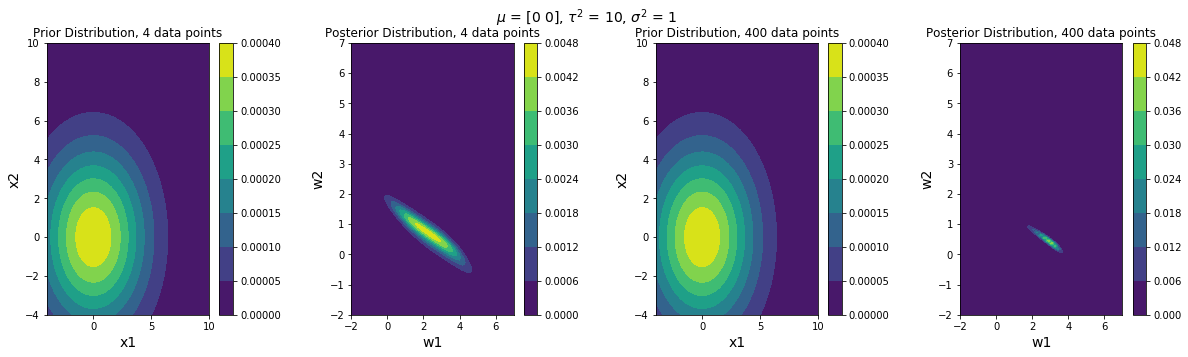

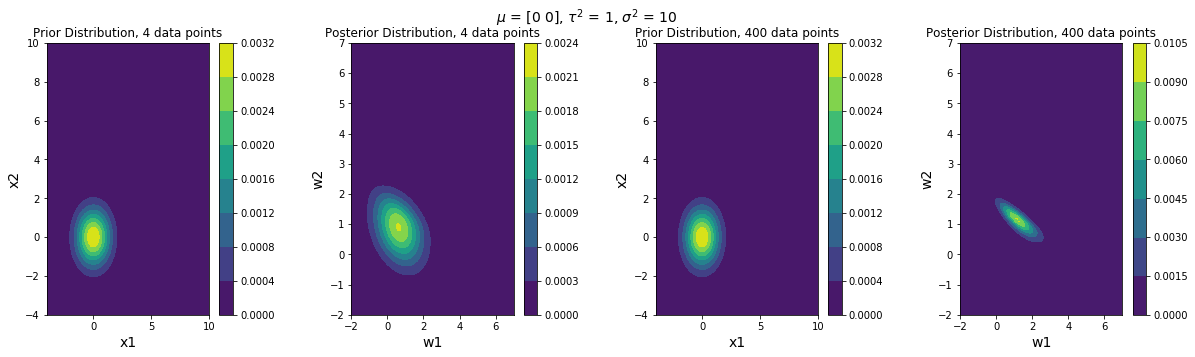

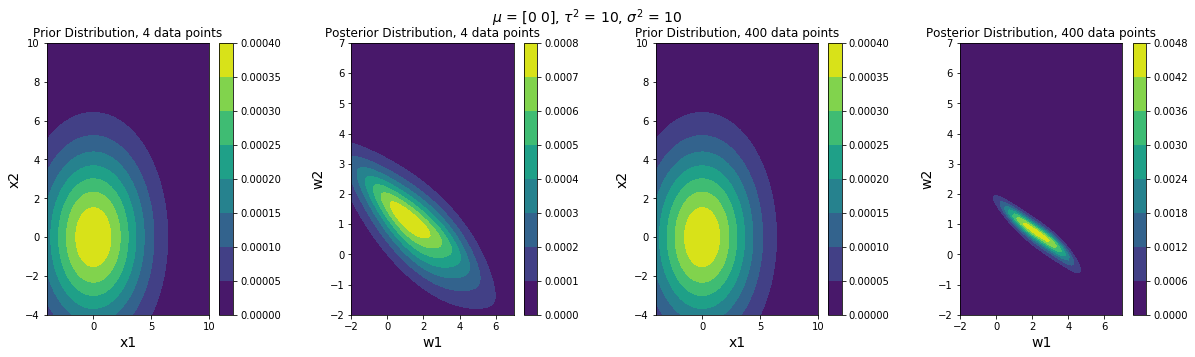

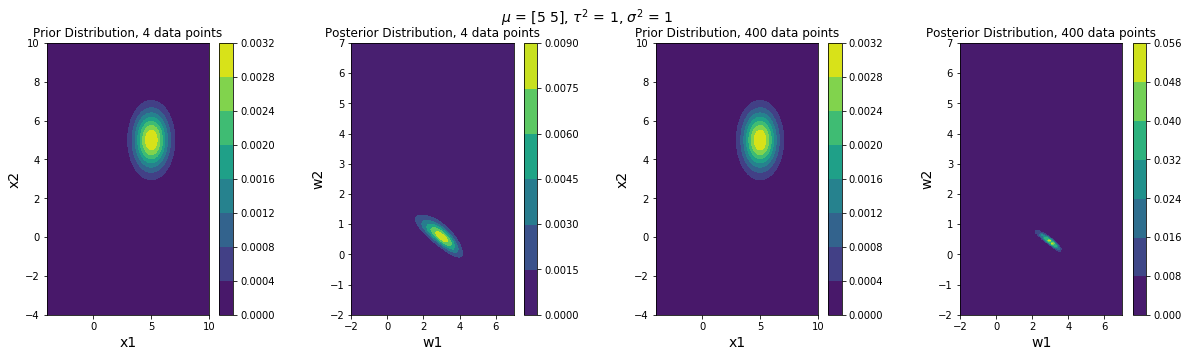

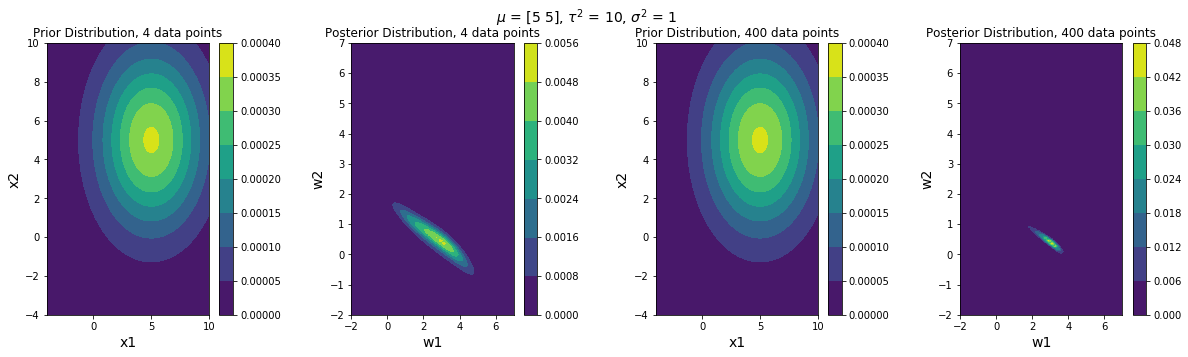

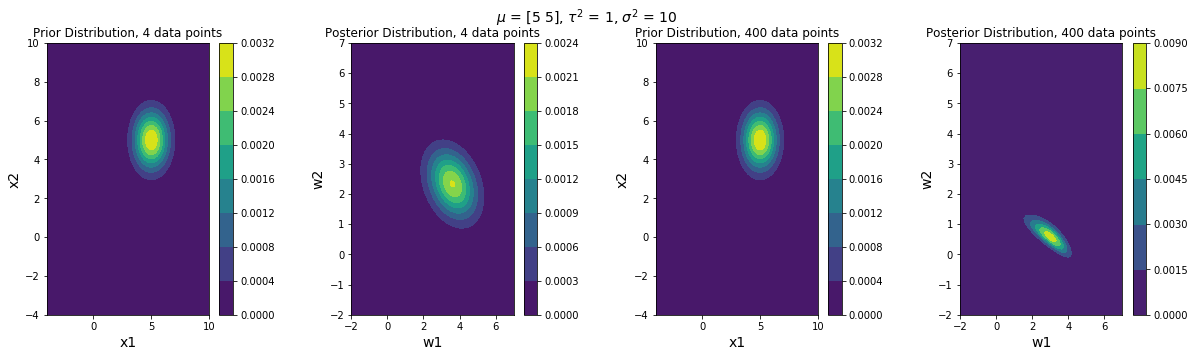

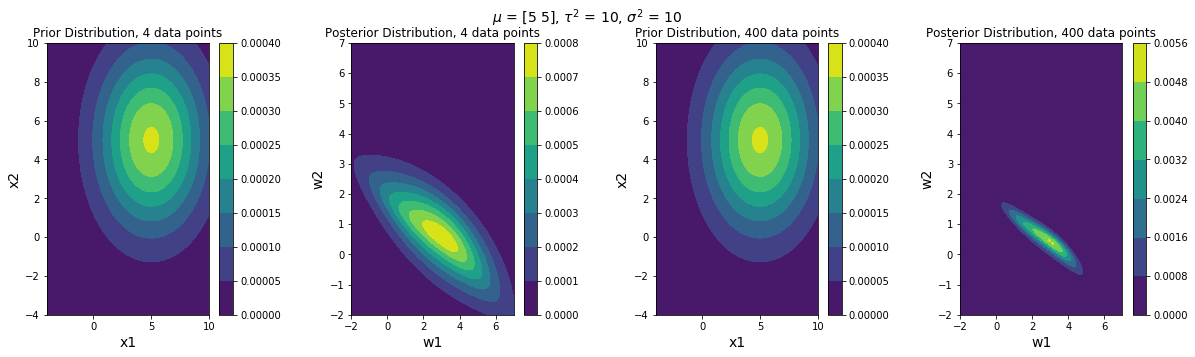

In [30]:
# Cell type : CodeWrite 
#Dataset with 4 points
X1 = np.array([[1,2],[2,2.1],[0.6,1.5],[1.1,2.9]])
Y1 = np.array([5.1, 6.1, 4.2, 2.9]).T

#Generating dataset with 400 points

X2_1 = X1[0,:]*np.ones([100,X1.shape[1]])
X2_2 = X1[1,:]*np.ones([100,X1.shape[1]])
X2_3 = X1[2,:]*np.ones([100,X1.shape[1]])
X2_4 = X1[3,:]*np.ones([100,X1.shape[1]])

Y2_1 = Y1[0]*np.ones([100,])
Y2_2 = Y1[1]*np.ones([100,])
Y2_3 = Y1[2]*np.ones([100,])
Y2_4 = Y1[3]*np.ones([100,])

X2 = np.vstack([X2_1,X2_2,X2_3,X2_4])
Y2 = np.hstack([Y2_1,Y2_2,Y2_3,Y2_4])

#Initializing all possibles values of mean, var and cov matrix
mu1 = np.array([0,5])
variance = np.array([1,10])
tau_sqaured = np.array([1,10])

#Grid for prior
XX1,XX2 = np.meshgrid(np.linspace(-4,10,100), np.linspace(-4,10,100))
Z1 = np.zeros(XX1.shape)

#Grid for posterior
W1, W2 = np.meshgrid(np.linspace(-2,7,100), np.linspace(-2,7,100))
Z2_4 = np.zeros(W1.shape)
Z2_400 = np.zeros(W1.shape)

#Figure size for plotting
plt.rcParams['figure.figsize'] = [20,5]

#Plotting and calculation of distribution
for mu2 in mu1:
    for var in variance:
        for tau_sq in tau_sqaured:
            #Value of mean to be used
            mu = np.array([mu2,mu2])
            
            #Calculating Priror Probablity over the grid space
            for i in range(len(XX1)):
                for j in range(len(XX2)):
                    x = np.array([XX1[i,j],XX2[i,j]])
                    Z1[i,j] = np.sqrt(1/(2*np.pi*np.linalg.det(tau_sq*np.identity(mu.shape[0]))))*np.exp((-0.5)*np.matmul(np.matmul((x-mu),np.linalg.inv(tau_sq*np.identity(mu.shape[0]))),(x-mu)))
            
            #Calculating Posterior Probablity
            for i in range(len(W1)):
                for j in range(len(W2)):
                    w = np.array([W1[i,j],W2[i,j]])
                    # For 4 Points
                    Z2_4[i,j] = np.exp((-0.5)*((1/var)*np.linalg.norm((Y1-np.matmul(X1,w.T))**2) + (1/tau_sq)*np.linalg.norm((w-mu))**2))
                    # For 400 Points
                    Z2_400[i,j] = np.exp((-0.5)*((1/var)*np.linalg.norm((Y2-np.matmul(X2,w.T))**2) + (1/tau_sq)*np.linalg.norm((w-mu))**2))
            
            #Plotting
            fig1, ax1 = plt.subplots(1,4)
            fig1.suptitle('$\mu$ = ' +str(mu)+ ', $\\tau^2$ = '+str(tau_sq)+ ', $\sigma^2$ = ' +str(var),fontsize=14)
            plt1 = ax1[0].contourf(XX1,XX2,Z1/Z1.sum())
            plt2 = ax1[1].contourf(W1,W2,Z2_4/Z2_4.sum())
            plt3 = ax1[2].contourf(XX1,XX2,Z1/Z1.sum())
            plt4 = ax1[3].contourf(W1,W2,Z2_400/Z2_400.sum())
            
            fig1.colorbar(plt1, ax=ax1[0])
            fig1.colorbar(plt2, ax=ax1[1])
            fig1.colorbar(plt3, ax=ax1[2])
            fig1.colorbar(plt4, ax=ax1[3])
            
            ax1[0].set_xlabel('x1',fontsize = 14)
            ax1[0].set_ylabel('x2',fontsize = 14)
            ax1[1].set_xlabel('w1',fontsize = 14)
            ax1[1].set_ylabel('w2',fontsize = 14)
            ax1[2].set_xlabel('x1',fontsize = 14)
            ax1[2].set_ylabel('x2',fontsize = 14)
            ax1[3].set_xlabel('w1',fontsize = 14)
            ax1[3].set_ylabel('w2',fontsize = 14)
            
            ax1[0].title.set_text('Prior Distribution, 4 data points')
            ax1[1].title.set_text('Posterior Distribution, 4 data points')
            ax1[2].title.set_text('Prior Distribution, 400 data points')
            ax1[3].title.set_text('Posterior Distribution, 400 data points')
            
            fig1.subplots_adjust(wspace = 0.5)  
            
            

   





** Cell type : TextWrite **

## Observations: 
1. The plot for prior distribution does not depend on the data. It only depends on $\tau^2$ and the mean. Higher $\\tau^2$ indicates higher variance in the data.
2. The plot for posterior distribution depends more on the data when the variance ($\sigma^2$) in the data is low. If the variance is high, the prior distribution becomes dominant and therefore the posterior distribution depends more on the prior distribution. (for low $\sigma^2$ the plots dont change a lot with $\tau^2$ and $\mu$ but for high $\sigma^2$, plots depend on $\tau^2$ and $\mu$)
3. As the number of datapoints increase the posterior distributions depends more on the data. This is the reason why different plots are obtained for different size of the dataset even when the larger dataset is simply a repetition of the smaller dataset.